(rasch-implementation-notebook)=
# Implementazione 

In [1]:
suppressPackageStartupMessages({
    library("tidyverse")
    library("eRm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("psychotools")
    library("latex2exp")
    })

Il set di dati `data.fims.Aus.Jpn.scored` contiene le risposte valutate per un sottoinsieme di item da parte di studenti australiani e giapponesi nello studio "First International Mathematics Study" (FIMS, Husén, 1967).

In [2]:
data(data.fims.Aus.Jpn.scored, package = "TAM")
fims <- data.fims.Aus.Jpn.scored

In [3]:
glimpse(fims)

Rows: 6,371
Columns: 16
$ SEX     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ M1PTI1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,…
$ M1PTI2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,…
$ M1PTI3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,…
$ M1PTI6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,…
$ M1PTI7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,…
$ M1PTI12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,…
$ M1PTI17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,…
$ M1PTI18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,…
$ M1PTI19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI21 <dbl> 

Oltre alle risposte sui 14 item di matematica, il data set contiene anche informazioni sul genere del partecipate e sul paese d'origine.

In [4]:
fims$SEX <- as.factor(fims$SEX)
levels(fims$SEX) <- c("male", "female")
fims$country <- as.factor(fims$country)
levels(fims$country) <- c("Australia", "Japan")

In [5]:
summary(fims[, c("SEX", "country")])

     SEX            country    
 male  :3319   Australia:4320  
 female:3052   Japan    :2051  

Seguiamo il tutorial di {cite:t}`debelak2022introduction` e esaminiamo le risposte dei primi 400 partecipanti. Con le seguenti istruzioni, per facilitare la manipolazione dei dati, cambiamo il nome delle colonne.

In [6]:
responses <- fims[1:400, 2:15]
colnames(responses) <- gsub("M1PTI", "I", colnames(responses))
glimpse(responses)

Rows: 400
Columns: 14
$ I1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, …
$ I6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, …
$ I7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, …
$ I12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, …
$ I17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, …
$ I18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, …
$ I19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I21 <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I22 <dbl> 0, 0, 

In [7]:
gender <- as.factor(fims$SEX[1:400])
levels(gender) <- c("male", "female")

Adattiamo ai dati il modello di Rasch. 

In [8]:
rm_sum0 <- RM(responses)

In [9]:
summary(rm_sum0)


Results of RM estimation: 

Call:  RM(X = responses) 

Conditional log-likelihood: -1886.529 
Number of iterations: 23 
Number of parameters: 13 

Item (Category) Difficulty Parameters (eta): with 0.95 CI:
    Estimate Std. Error lower CI upper CI
I2    -1.420      0.121   -1.658   -1.183
I3    -2.210      0.145   -2.494   -1.926
I6    -0.215      0.108   -0.426   -0.004
I7     2.364      0.170    2.031    2.697
I11   -1.420      0.121   -1.658   -1.183
I12    0.642      0.113    0.422    0.863
I14   -0.663      0.110   -0.879   -0.448
I17    1.152      0.122    0.913    1.391
I18   -0.565      0.109   -0.778   -0.351
I19    1.889      0.146    1.602    2.175
I21    1.578      0.134    1.315    1.841
I22    2.244      0.163    1.925    2.564
I23   -2.103      0.141   -2.379   -1.827

Item Easiness Parameters (beta) with 0.95 CI:
         Estimate Std. Error lower CI upper CI
beta I1     1.273      0.118    1.041    1.504
beta I2     1.420      0.121    1.183    1.658
beta I3     2.210

Di default, l'algoritmo implementato da `RM()` produce stime dei parametri di difficoltà degli item con il vincolo che tali stime abbiano media 0.  Verifichiamo.

In [10]:
coef(rm_sum0) |> print()

   beta I1    beta I2    beta I3    beta I6    beta I7   beta I11   beta I12 
 1.2725717  1.4203230  2.2098398  0.2153106 -2.3639411  1.4203230 -0.6423859 
  beta I14   beta I17   beta I18   beta I19   beta I21   beta I22   beta I23 
 0.6632561 -1.1517115  0.5646248 -1.8886152 -1.5781132 -2.2444186  2.1029365 


In [11]:
sum(rm_sum0$betapar)

[1] 8.881784e-16

Possiamo esaminare le stime sia nei termini della facilità che della difficoltà degli item.

In [12]:
tab <- data.frame(
    item_score = colSums(responses),
    easiness = coef(rm_sum0),
    difficulty = -coef(rm_sum0)
)
tab[order(tab$item_score), ]

,item_score,easiness,difficulty
,<dbl>,<dbl>,<dbl>
I7,40,-2.3639411,2.3639411
I22,44,-2.2444186,2.2444186
I19,58,-1.8886152,1.8886152
I21,73,-1.5781132,1.5781132
I17,98,-1.1517115,1.1517115
I12,134,-0.6423859,0.6423859
I6,204,0.2153106,-0.2153106
I18,233,0.5646248,-0.5646248
I14,241,0.6632561,-0.6632561


## Valutazione del Test

Il primo strumento per la valutazione dei test che vorremmo presentare sono i metodi grafici. Il primo di questi, la mappa persona-item, mostra se il campione di persone copre l'intera gamma degli item e viceversa. Il secondo approccio, che consiste nel confrontare le ICC (Curve Caratteristiche dell'Item) teoriche ed empiriche, può aiutare a rilevare gli item che non si adattano bene. Il terzo, il test grafico, è un test visivo per il Funzionamento Differenziale degli Item (DIF).

### Person−Item Map

Abbiamo in precedenza che il modello di Rasch posiziona persone e item sulla stessa scala latente e che l'accuratezza delle stime dei parametri dipende dalla posizione delle persone rispetto agli item. La mappa persona-item è una rappresentazione visiva delle posizioni degli item e delle persone sul continuum latente. Per poter stimare con precisione i parametri degli item a partire dal campione delle persone e viceversa, le difficoltà degli item dovrebbero coprire l'intera gamma delle abilità delle persone e viceversa.

La mappa persona-item si ottiene nel modo seguente con `eRm`.

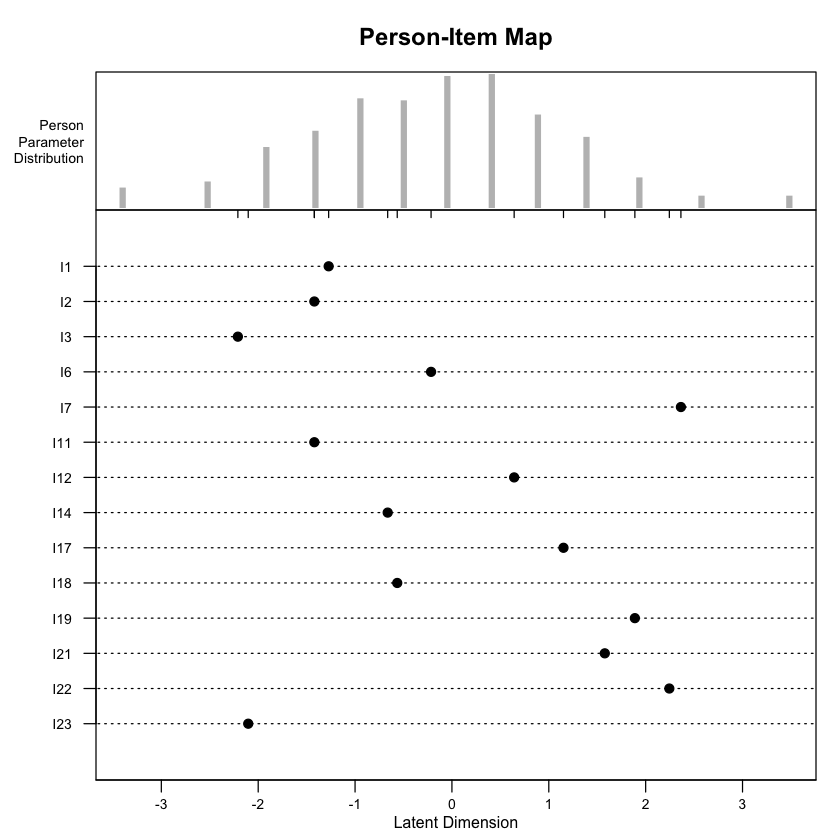

In [13]:
plotPImap(rm_sum0)

La parte superiore della mappa persona-item mostra un istogramma delle stime dei parametri di abilità, mentre la parte inferiore mostra le stime delle difficoltà per ciascun item del test. Per ogni item, la stima della difficoltà è indicata dalla posizione del punto sulla linea tratteggiata corrispondente a quell'item. Ad esempio, la difficoltà stimata per l'item 1 corrisponde alla posizione del punto sulla linea tratteggiata più in alto. La mappa persona-item offre un controllo visivo di coerenza per le stime del nostro modello IRT (Teoria della Risposta all'Item). Le stime delle abilità sono più accurate quando cadono nel mezzo della distribuzione dei parametri degli item e viceversa. Pertanto, idealmente, l'istogramma delle abilità e le stime delle difficoltà dovrebbero essere centrate sullo stesso punto e mostrare un'ampia sovrapposizione. Nel nostro test, sembra essere questo il caso.

### ICC Empiriche

Le Curve Caratteristiche degli Item (ICC) descrivono la relazione teorica tra l'abilità dei partecipanti al test e la probabilità di una risposta corretta che ci aspettiamo sotto il modello di Rasch per una data difficoltà. La ICC attesa per un item può essere tracciata dopo che la sua difficoltà è stata stimata.  Oltre alle probabilità attese di una risposta corretta illustrate dall'ICC, possiamo anche tracciare le frequenze relative empiriche di una risposta corretta. Queste frequenze relative empiriche sono indicate nella figura come punti e vengono chiamate ICC empiriche. 

Usando `eRm` possimo generare le ECC empiriche nel modo seguente.

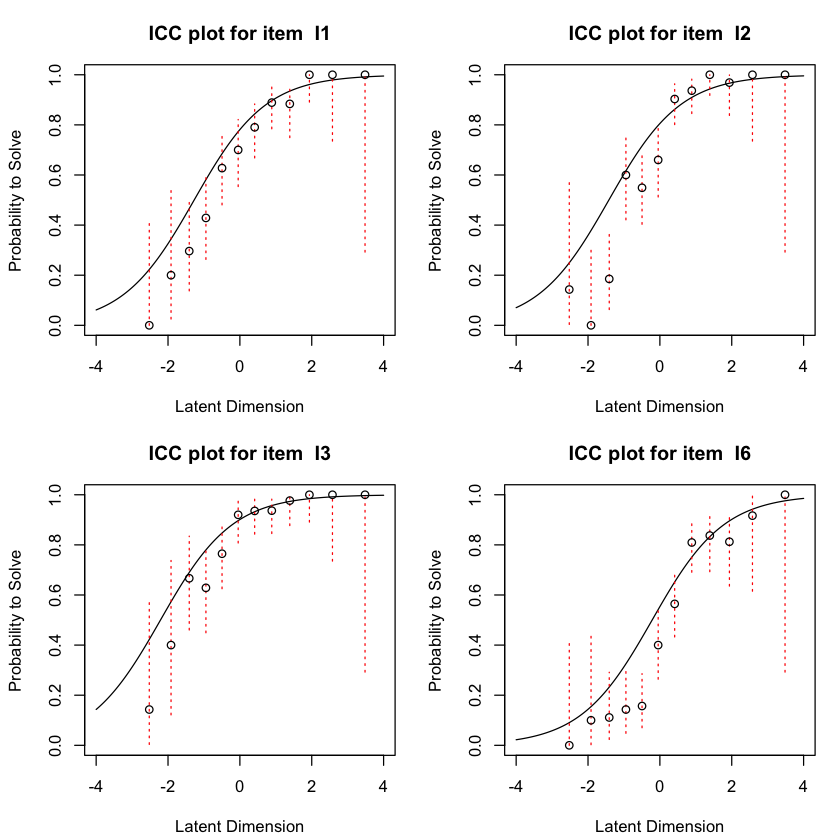

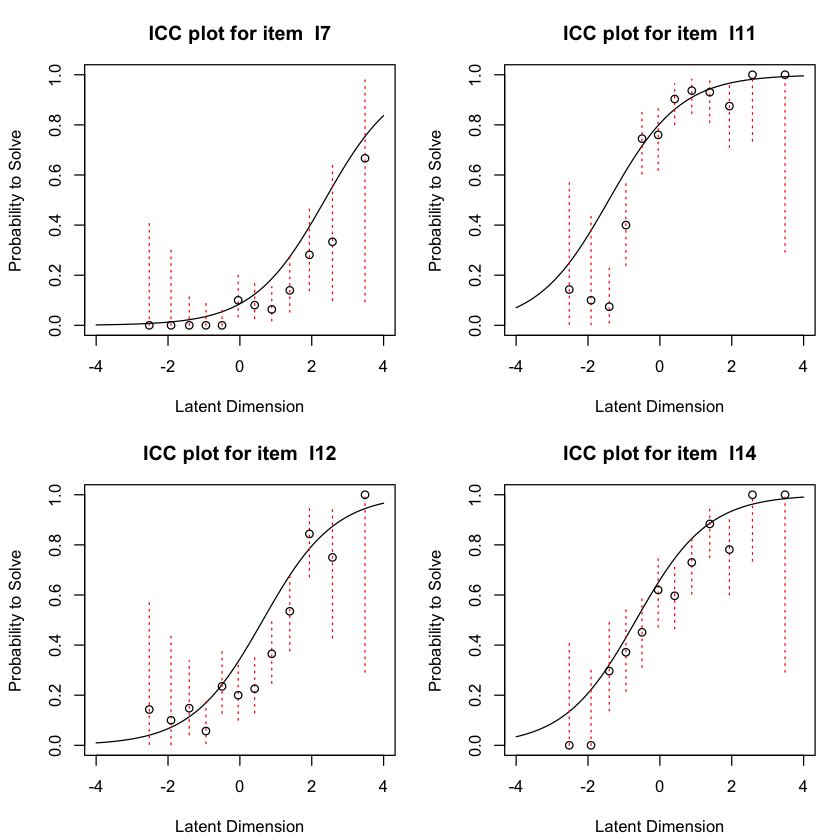

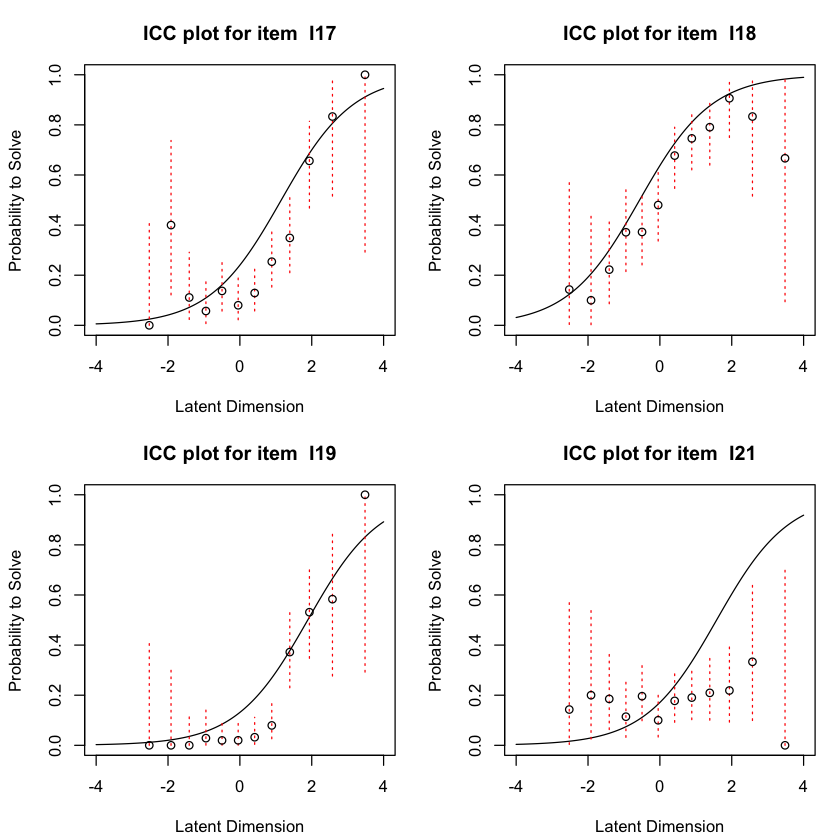

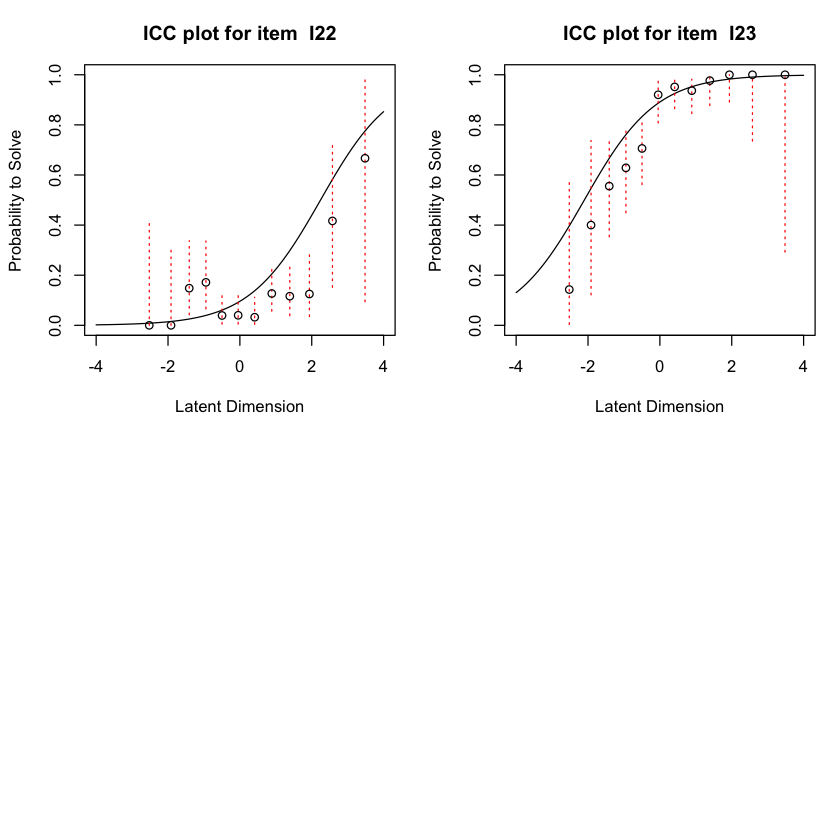

In [14]:
plotICC(
    rm_sum0, 
    item.subset = "all",
    empICC = list("raw"), 
    empCI = list()
)

Le ICC empiriche sono rappresentate dai singoli punti, mentre la ICC attesa sotto il modello di Rasch è indicata dalla linea liscia. Dalle figure precedenti, per gli item 12 e 14 notiamo che in generale la forma dell'ICC empirica è molto ben allineata con l'ICC attesa, ma per l'item 12 l'ICC empirica mostra valori sopra zero anche per le abilità più basse a sinistra della dimensione latente. Questo potrebbe indicare una tendenza al tentativo di indovinare (guessing). Per l'item 19, l'ICC empirica appare più ripida dell'ICC attesa sotto il modello di Rasch. Mostra un salto molto più pronunciato tra la prima metà approssimativa dei punti e i punti rimanenti. Per l'item 21, al contrario, l'ICC empirica è molto più piatta rispetto a quella attesa. Confronteremo la nostra impressione visiva con le statistiche di adattamento degli item per questi item di seguito.

### Test Grafico

Il test grafico del modello, basato sui principi di Rasch (1960), è un metodo intuitivo per valutare l'invarianza degli item in un test, confrontando i parametri degli item stimati per due gruppi di persone. Affinché il modello di Rasch sia considerato valido, è necessario che le stime dei parametri degli item per i diversi gruppi concordino, fino a una trasformazione lineare. In termini pratici, ciò si traduce nel fatto che, quando visualizzate in un grafico, le stime dei parametri degli item dei due gruppi dovrebbero allinearsi lungo una linea retta.

Per complementare questa analisi, possiamo ricorrere al test del rapporto di verosimiglianza di Andersen (1973), un approccio ben consolidato per verificare l'adeguatezza del modello di Rasch nel rappresentare il comportamento dei partecipanti ai test. Il test di Andersen valuta se le stime dei parametri degli item rimangono consistenti tra diversi gruppi di partecipanti. Se i parametri degli item stimati individualmente per ciascun gruppo differiscono significativamente, ciò indica che il modello di Rasch potrebbe non essere un'adeguata rappresentazione del comportamento osservato nei test.

A differenza del test grafico, il test del rapporto di verosimiglianza confronta il massimo della verosimiglianza condizionata sotto il modello di Rasch con il massimo della verosimiglianza condizionata quando i parametri degli item possono variare tra i gruppi. Questa metodologia offre un'indicazione di quanto efficacemente ciascun modello rappresenti il comportamento dei partecipanti.

Il test del rapporto di verosimiglianza utilizza la statistica di test T = −2 · log(LR), che ha una distribuzione campionaria approssimativamente χ² per campioni grandi. Valori del rapporto di verosimiglianza inferiori a 1, o valori elevati di T, suggeriscono una violazione del modello di Rasch.

Il test di Andersen è implementato nel pacchetto eRm in R, offrendo uno strumento utile per l'analisi. Tuttavia, è importante notare che un risultato non significativo in questo test non può essere interpretato automaticamente come supporto per il modello di Rasch, specialmente se il modello più generale non descrive adeguatamente i dati. Inoltre, la capacità di rilevare differenze tra i gruppi specificati dipende dall'effettiva diversità dei parametri del modello tra questi gruppi. Approcci più flessibili per rilevare le differenze nei parametri sono stati messi a punto.

In [15]:
lrt_mean_split <- LRtest(rm_sum0, splitcr = "mean")
lrt_mean_split


Andersen LR-test: 
LR-value: 79.71 
Chi-square df: 13 
p-value:  0 


L'output di questo test mostra una violazione significativa del modello di Rasch al livello α = 0,05. 

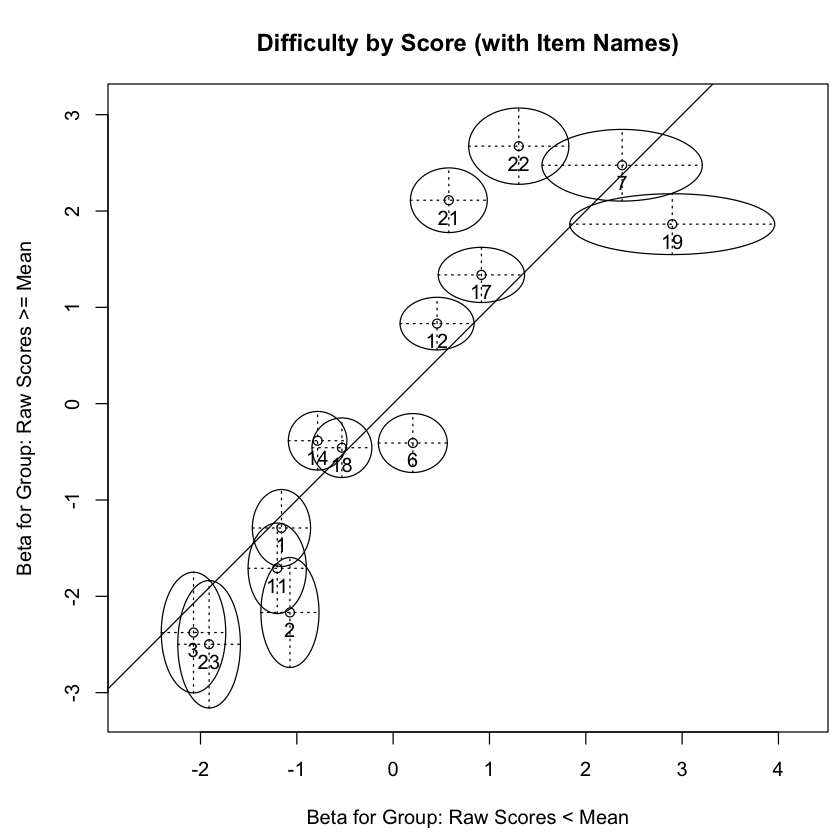

In [16]:
plotGOF(
    lrt_mean_split,
    tlab = "item", pos = 1,
    main = "Difficulty by Score (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)

Ora possiamo tracciare le stime delle difficoltà di ciascun gruppo utilizzando la funzione `plotGOF()` per creare il test grafico. La funzione `plotGOF()` prende il risultato di `LRtest()` e traccia le stime dei parametri degli item per i due gruppi. Per facilitare la valutazione visiva, `plotGOF()` può opzionalmente etichettare gli item e aggiungere ellissi di confidenza. 

Per creare il grafico per il test grafico basato sulla divisione media, possiamo procedere in questo modo: ogni piccolo cerchio nella Figura mostra le stime delle difficoltà per un singolo item. La coordinata x di un cerchio indica la sua stima di difficoltà per i partecipanti al test con punteggi sotto la media e la sua coordinata y indica la stima di difficoltà per i partecipanti al test con punteggi sopra la media. La linea y = x è fornita come riferimento, poiché i punti che cadono su questa linea avrebbero la stessa stima in entrambi i gruppi. La distanza tra qualsiasi punto e la linea di riferimento y = x indica quanto le stime differiscono tra i due gruppi. Indica anche la direzione di questa differenza. Gli item sotto la linea sono più difficili per i partecipanti al test con punteggi sotto la media, mentre gli item sopra la linea sono più difficili per i partecipanti al test con punteggi sopra la media.

Gli assi orizzontali e verticali mostrano intervalli di confidenza per le stime per ciascun gruppo di partecipanti al test. La larghezza di ciascun intervallo di confidenza è determinata dall'elemento gamma della lista fornita a `conf`. L'impostazione predefinita `gamma = .95` produce intervalli di confidenza al 95% per ciascun asse dell'ellisse. Quando un'ellisse di confidenza non incrocia la linea di riferimento, l'item rispettivo è diagnosticato come mostrante un significativo DIF.

La figura indica che gli item 2, 6, 21 e 22 differiscono significativamente tra le persone con punteggi sopra e sotto la media, poiché le loro ellissi di confidenza non incrociano la linea di riferimento. Gli item 21 e 22 sono più difficili per le persone con punteggi pari o superiori alla media, mentre gli item 2 e 6 sono più difficili per le persone con punteggi sotto la media. Tali violazioni del modello possono verificarsi quando le ICC osservate differiscono dalle ICC attese sotto il modello di Rasch per i partecipanti al test con abilità basse e alte. Questo può accadere, ad esempio, se è presente il tentativo di indovinare (guessing), o se la pendenza è più ripida o meno ripida di quanto previsto dal modello di Rasch.

Possiamo anche fornire all'argomento `splitcr` una variabile che divide i partecipanti al test in gruppi. Ad esempio, possiamo testare se i parametri degli item differiscono in base al genere passando un vettore contenente le appartenenze di gruppo come argomento splitcr. 

In [17]:
lrt_gender <- LRtest(rm_sum0, splitcr = gender)
lrt_gender


Andersen LR-test: 
LR-value: 32.973 
Chi-square df: 13 
p-value:  0.002 


Come nel test precedente, anche il Test del Rapporto di Verosimiglianza (LRT) per il genere indica una violazione significativa del modello di Rasch al livello α = 0.05.

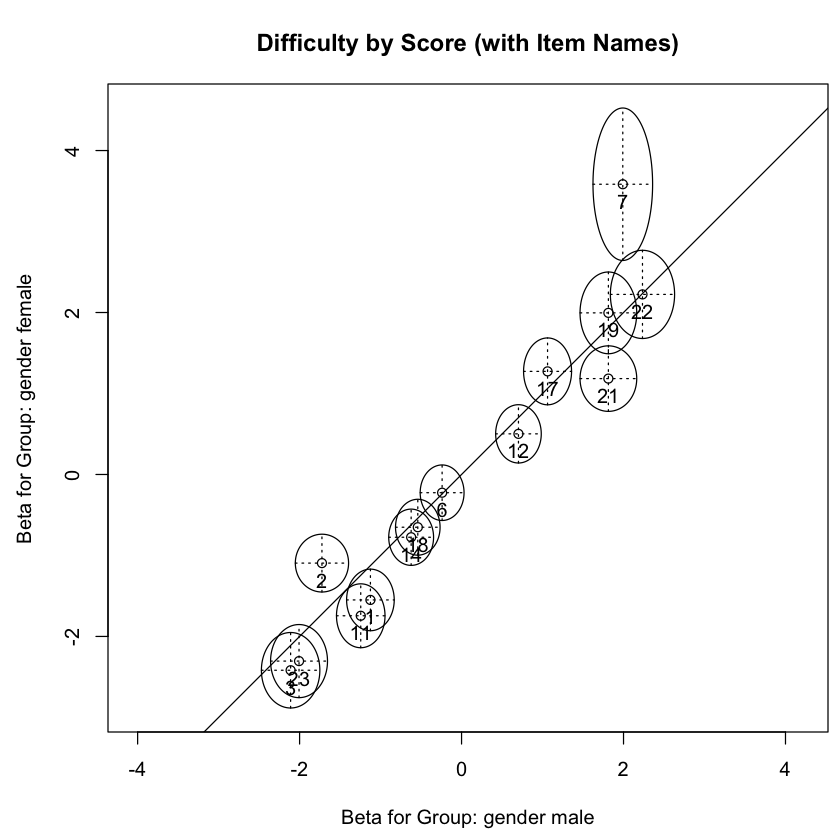

In [18]:
plotGOF(
    lrt_gender,
    tlab = "item", pos = 1,
    main = "Difficulty by Score (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)

La figura indica che gli item 2, 7 e 21 differiscono tra partecipanti al test femminili e maschili. Gli item 2 e 7 sono più difficili per i partecipanti femminili, mentre l'item 21 è più difficile per i partecipanti maschili.

### Test di Wald

Le impostazioni del test del rapporto di verosimiglianza di Andersen (1973) e del test di Wald sono molto simili. Entrambi i test si basano sull'idea che il modello di Rasch sia un modello ragionevole per i dati dei test solo se i parametri degli item stimati non variano sistematicamente tra gruppi di persone. In entrambi i test, consideriamo le stime dei parametri degli item per ciascun gruppo di persone. A differenza del test del rapporto di verosimiglianza, tuttavia, il test di Wald confronta direttamente le stime dei parametri degli item dei gruppi. In sostanza, il test di Wald calcola la differenza tra la stima del primo gruppo della difficoltà dell'item i, β̂(1)i, e quella del secondo gruppo, β̂(2)i. Questa differenza viene divisa per il suo errore standard per tenere conto del fatto che tutte le stime sono soggette a rumore. Questo porta alla statistica di test per l'item i:

$$ 
T_i = \frac{\hat{\beta}^{(1)}_i - \hat{\beta}^{(2)}_i}{\sqrt{se(\hat{\beta}^{(1)}_i)^2 + se(\hat{\beta}^{(2)}_i)^2}}, 
$$

dove $ se(\hat{\beta}^{(1)}_i) $ e $ se(\hat{\beta}^{(2)}_i) $ indicano rispettivamente gli errori standard di $ \hat{\beta}^{(1)}_i $ e $ \hat{\beta}^{(2)}_i $.

Per campioni di grandi dimensioni, $ T_i $ approssimativamente segue una distribuzione normale standard sotto l'ipotesi nulla che il vero parametro dell'item sia lo stesso per entrambi i gruppi. Valori estremi di $ T_i $ sono improbabili sotto la distribuzione normale. Quindi, un valore estremo di $ T_i $, con un piccolo valore p, indica che l'item i viola il modello di Rasch.

Eseguiamo il test con `R`:

In [19]:
Waldtest(rm_sum0, splitcr = "mean")


Wald test on item level (z-values):

         z-statistic p-value
beta I1       -0.514   0.607
beta I2       -3.328   0.001
beta I3       -0.838   0.402
beta I6       -2.555   0.011
beta I7        0.210   0.834
beta I11      -1.773   0.076
beta I12       1.562   0.118
beta I14       1.821   0.069
beta I17       1.550   0.121
beta I18       0.333   0.739
beta I19      -1.827   0.068
beta I21       5.768   0.000
beta I22       4.106   0.000
beta I23      -1.560   0.119


Questi test indicano nuovamente che gli item 2, 6, 21 e 22 differiscono significativamente tra i partecipanti al test con punteggi sopra e sotto la media.

Possiamo anche eseguire il test per la differenza tra maschi e femmine:

In [20]:
Waldtest(rm_sum0, splitcr = gender)


Wald test on item level (z-values):

         z-statistic p-value
beta I1       -1.727   0.084
beta I2        2.543   0.011
beta I3       -1.020   0.308
beta I6        0.067   0.946
beta I7        3.089   0.002
beta I11      -1.978   0.048
beta I12      -0.861   0.389
beta I14      -0.673   0.501
beta I17       0.815   0.415
beta I18      -0.493   0.622
beta I19       0.583   0.560
beta I21      -2.305   0.021
beta I22      -0.030   0.976
beta I23      -1.019   0.308


I risultati qui concordano in gran parte anche con la figura precedente. In linea con il test grafico, il test di Wald indica che gli item 2, 7 e 21 differiscono tra i gruppi.

### Ancoraggio

L'ancoraggio è una procedura cruciale quando si confrontano le stime dei parametri degli item tra diversi gruppi, un passo fondamentale in test come il Wald e in metodi grafici. Tale processo necessita di particolare attenzione perché implica la restrizione di alcuni parametri degli item per allineare le scale latenti tra i gruppi. Ad esempio, fissare il parametro del primo item a zero in entrambi i gruppi crea un punto di riferimento comune, ma anche limitazioni.

La scelta degli item di ancoraggio è delicata: fissare un parametro in entrambi i gruppi significa non poter più valutare la differenza per quell'item specifico. La selezione dovrebbe essere guidata da un'attenta analisi dei dati e da considerazioni teoriche. Approcci guidati dai dati sono stati proposti per identificare item invarianti o escludere quelli con DIF, processo noto come purificazione. Tuttavia, occorre cautela: anche metodi ben progettati possono portare a conclusioni errate se gli item di ancoraggio scelti sono inappropriati.

In pratica, spesso si adotta una restrizione in cui la somma dei parametri degli item è zero per tutti i gruppi. Questo approccio, adottato da pacchetti software come eRm e difR in R, si basa sull'assunzione che eventuali DIF si annullino su tutti gli item. Ma se questa assunzione non è valida, o se l'ancoraggio include item con DIF, potremmo incorrere in errori interpretativi.

In sintesi, l'ancoraggio è una strategia potente ma che richiede un'attenta considerazione e un'analisi critica. È fondamentale non solo selezionare gli item di ancoraggio adeguati ma anche interpretare i risultati con una comprensione chiara delle ipotesi e delle potenziali limitazioni del metodo scelto.

In [21]:
resp <- as.matrix(responses)
anchortest(
    resp ~ gender,
    class = "constant",
    select = "MPT"
)

Caricamento dei namespace richiesti: multcomp



Anchor items:
respI23, respI22, respI3, respI12

Final DIF tests:

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
              Estimate Std. Error z value Pr(>|z|)   
respI1 == 0   0.219719   0.291240   0.754  0.45059   
respI2 == 0  -0.833442   0.293433  -2.840  0.00451 **
respI3 == 0   0.102831   0.268527   0.383  0.70176   
respI6 == 0  -0.218867   0.271100  -0.807  0.41948   
respI7 == 0  -1.796947   0.570838  -3.148  0.00164 **
respI11 == 0  0.295994   0.298354   0.992  0.32115   
respI12 == 0 -0.002993   0.227220  -0.013  0.98949   
respI14 == 0 -0.051342   0.274131  -0.187  0.85143   
respI17 == 0 -0.415041   0.307060  -1.352  0.17648   
respI18 == 0 -0.092938   0.272840  -0.341  0.73338   
respI19 == 0 -0.386569   0.360996  -1.071  0.28424   
respI21 == 0  0.425198   0.320519   1.327  0.18464   
respI22 == 0 -0.193457   0.300373  -0.644  0.51954   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univariate p values reported)


In [22]:
anchortest(
    resp ~ gender,
    class = "forward",
    select = "MTT"
)

Anchor items:
respI23, respI12, respI14, respI18, respI6, respI1, respI11, respI17,
respI19

Final DIF tests:

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)   
respI1 == 0   0.28177    0.23616   1.193  0.23283   
respI2 == 0  -0.77140    0.26596  -2.900  0.00373 **
respI3 == 0   0.16488    0.32294   0.511  0.60967   
respI6 == 0  -0.15682    0.21567  -0.727  0.46715   
respI7 == 0  -1.73490    0.55736  -3.113  0.00185 **
respI11 == 0  0.35804    0.24322   1.472  0.14099   
respI12 == 0  0.05905    0.22616   0.261  0.79401   
respI14 == 0  0.01070    0.21884   0.049  0.96099   
respI17 == 0 -0.35300    0.25138  -1.404  0.16026   
respI18 == 0 -0.03089    0.21750  -0.142  0.88706   
respI19 == 0 -0.32452    0.30298  -1.071  0.28412   
respI21 == 0  0.48724    0.29524   1.650  0.09887 . 
respI22 == 0 -0.13141    0.37175  -0.353  0.72372   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univaria

In [23]:
anchortest(
    resp ~ gender,
    select = "Gini"
)

Anchor items:
respI23

Final DIF tests:

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
              Estimate Std. Error z value Pr(>|z|)   
respI1 == 0   0.126100   0.387369   0.326  0.74478   
respI2 == 0  -0.927061   0.389044  -2.383  0.01718 * 
respI3 == 0   0.009212   0.427183   0.022  0.98279   
respI6 == 0  -0.312486   0.376562  -0.830  0.40663   
respI7 == 0  -1.890565   0.632101  -2.991  0.00278 **
respI11 == 0  0.202375   0.392278   0.516  0.60593   
respI12 == 0 -0.096612   0.386789  -0.250  0.80276   
respI14 == 0 -0.144961   0.376949  -0.385  0.70056   
respI17 == 0 -0.508660   0.407380  -1.249  0.21181   
respI18 == 0 -0.186557   0.376409  -0.496  0.62016   
respI19 == 0 -0.480188   0.450796  -1.065  0.28679   
respI21 == 0  0.331579   0.418092   0.793  0.42773   
respI22 == 0 -0.287076   0.476210  -0.603  0.54662   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univariate p values reported)


Gli output di `R` della funzione `anchortest()` elencano gli item di ancoraggio selezionati dai rispettivi approcci di selezione dell'ancoraggio, oltre ai risultati del test di Wald basati su questi item di ancoraggio. Tutti e tre gli approcci portano a risultati in cui solo gli item 2 e 7 mostrano DIF per genere, mentre il test grafico e il test di Wald in eRm hanno identificato anche l'item 21 e l'item 11 (al limite) come aventi DIF.

Riesaminando il test grafico nella figura precedente, notiamo che gli item 2 e 7 mostrano DIF nella stessa direzione (sopra la diagonale), mentre gli item 21 e 11 sono orientati nella direzione opposta (sotto la diagonale) e in misura minore.

Considerando questi risultati nel loro insieme, si può concludere che potrebbe essere presente un DIF non bilanciato e che la diagonale usata nella Figura 6.4 non è ideale per valutare gli item. Per illustrare ciò, tracciamo manualmente una linea di riferimento alternativa attraverso la posizione dell'item 23, che è stato selezionato come item di ancoraggio (primario) dai tre approcci presentati in psychotools, utilizzando il comando `abline`.

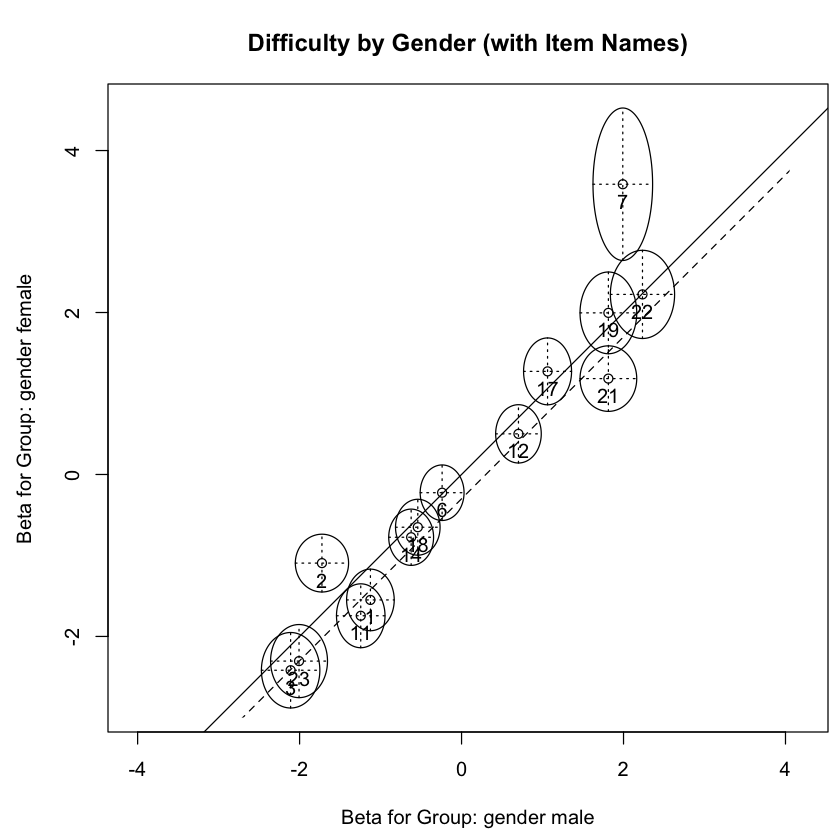

In [24]:
 plotGOF(
    lrt_gender,
    tlab = "item", pos = 1,
    main = "Difficulty by Gender (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)
abline(-0.3, 1, lty=2)

Come si può vedere nella figura risultante, basandoci sulla linea di riferimento alternativa, non troviamo più DIF negli item 11 e 21, ma gli item 2 e 7 mostrano ancora più chiaramente un DIF.

Per questo set di dati, la stessa conclusione viene raggiunta in `eRm` quando si utilizza la funzione `stepwiseIt()`, che esegue diversi test di Wald e ad ogni passo esclude l'item singolo con la statistica di test più grande.

In [25]:
stepwiseIt(rm_sum0, criterion = list("Waldtest", gender))

Eliminated item - Step 1: I7
Eliminated item - Step 2: I2



Results for stepwise item elimination:
Number of steps: 2 
Criterion: Waldtest

           z-statistic p-value
Step 1: I7       3.089   0.002
Step 2: I2       3.059   0.002


Utilizzando questo metodo, dopo l'esclusione degli item 7 e 2, che presentavano il DIF più marcato, non si rilevano più differenze significative nei test degli item rimanenti. Per visualizzare meglio questo processo, immaginiamo la figura precedente: inizialmente, la linea di riferimento corrisponde alla diagonale solida. Tuttavia, dopo aver eliminato l'item 7, questa linea si sposta verso quella tratteggiata nel secondo passaggio e, rimuovendo poi l'item 2, si allinea o si avvicina molto alla linea tratteggiata nel terzo passaggio. Di conseguenza, gli item restanti non mostrano più un DIF significativo.

In sintesi, mentre i test grafici e di Wald basati sulla restrizione della somma zero possono risultare ingannevoli in presenza di un DIF non bilanciato, l'impiego di metodi di ancoraggio avanzati e l'approccio di eliminazione graduale degli item possono offrire una visione più accurata e dettagliata della situazione.


## Rimozione di item 

Se questa analisi facesse parte della costruzione di un test reale, gli item che mostrano DIF (o altre anomalie nelle analisi successive) dovrebbero essere attentamente esaminati da esperti di contenuto per decidere se modificarli o rimuoverli dal test. Nella discussione seguente, tuttavia, non rimuoveremo gli item perché desideriamo mantenere il set di dati completo. Tuttavia, se si desiderasse rimuovere alcuni item (ovvero colonne) dal set di dati, ciò potrebbe essere fatto con i seguenti comandi.

In [26]:
responses_removeDIFitems <- responses[, -which(colnames(responses) %in% c("I2", "I7"))]
colnames(responses_removeDIFitems)

[1] "I1"  "I3"  "I6"  "I11" "I12" "I14" "I17" "I18" "I19" "I21" "I22" "I23"

Dopo aver rimosso degli item, l'intero processo dovrebbe ricominciare da capo, rifacendo il modello di Rasch e indagando sugli item rimanenti. 

### Test di Martin-Löf 

Nella sezione precedente, abbiamo visto che il test del rapporto di verosimiglianza di Andersen (1973) verifica l'ipotesi che i parametri degli item siano invarianti per vari gruppi di persone. Una ipotesi correlata riguarda l'invarianza dei parametri delle persone per diversi gruppi di item.

Qui, la domanda fondamentale è se diversi gruppi di item misurino tratti latenti differenti. Ciò rappresenterebbe una violazione del modello di Rasch, il quale implica un singolo tratto latente alla base di tutti gli item. Se questo tipo di violazione del modello viene rilevato, un modello IRT multidimensionale potrebbe essere più appropriato. 

Un metodo comune per valutare la dimensionalità in generale è l'analisi fattoriale esplorativa. Qui invece descriveremo il test di Martin-Löf che affronta l'ipotesi alternativa secondo cui gruppi di item misurano tratti latenti differenti ed è disponibile nel pacchetto `eRm`. Come il test del rapporto di verosimiglianza di Andersen, questo test si basa sul confronto di due verosimiglianze condizionate. La prima verosimiglianza condizionata Lu(r,β) è quella del modello di Rasch. La seconda verosimiglianza condizionata Lu(r1, r2, β) è nuovamente quella di un modello più generale che ora permette diversi parametri di persona per specifici gruppi di item. I gruppi di item devono essere definiti prima dell'analisi, il che può essere fatto in base alle loro difficoltà (cioè, testiamo item facili contro difficili) o in base a diverse dimensioni latenti che si sospetta siano misurate dai gruppi di item (cioè, il gruppo di item 1 è sospettato di misurare una dimensione latente diversa rispetto al gruppo di item 2). Se la seconda verosimiglianza è maggiore, ciò indica una violazione del modello di Rasch (analogamente al test del rapporto di verosimiglianza di Andersen).

Il test di Martin-Löf è spesso descritto come un test per la unidimensionalità. Certi tipi di multidimensionalità possono anche manifestarsi come DIF. Per questa ragione, i test che mirano a rilevare il DIF, possono anche essere sensibili a certe violazioni della unidimensionalità.

In [27]:
mloef_median <- MLoef(rm_sum0, splitcr = "median")
mloef_median


Martin-Loef-Test (split criterion: median)
LR-value: 67.083 
Chi-square df: 48 
p-value: 0.036 


Otteniamo un valore p inferiore a 0.05. Ciò indica che le stime dei parametri delle persone ottenute dagli item facili e difficili differiscono in modo significativo, ovvero, una violazione del modello di Rasch.

## Item e Person Fit

Certainly, let's improve and refine the translation:

---

### Tests e Statistiche di Bontà di Adattamento

In questa sezione esaminiamo una varietà di metodi per valutare l'adattamento dei dati di risposta agli item e al modello di Rasch. Alcuni di questi metodi sono test statistici formali, mentre altri sono statistiche descrittive per le quali sono stati suggeriti nella letteratura dei limiti critici empirici. Vedremo anche che esistono approcci per valutare l'adattamento a livello dell'intero test psicologico, così come approcci focalizzati sulla valutazione dell'adattamento di singoli item o individui.

#### Test di Bontà di Adattamento χ2 e G2

Nella valutazione del modello di Rasch, esaminiamo due classi principali di test di bontà di adattamento: il test χ2 e il test G2, entrambi noti nell'analisi delle tabelle di contingenza. A differenza dei test del rapporto di verosimiglianza o dei test di Martin-Löf, il test χ2 non confronta l'adattamento relativo di due modelli. Piuttosto, esso valuta quanto accuratamente i modelli di risposta previsti dal modello di Rasch corrispondano ai modelli di risposta osservati. Questo avviene attraverso il confronto tra il numero di partecipanti che mostrano ciascun modello di risposta osservato e il numero previsto dal modello di Rasch.

Il principio dei test di bontà di adattamento χ2 per il modello di Rasch è basato sull'analisi di tutti i possibili modelli di risposta (combinazioni di 0 e 1 per risposte errate e corrette). Definiamo Ou come il numero osservato di partecipanti con il modello di risposta u e Eu come il numero previsto sotto il modello di Rasch. La statistica del test χ2 è data da:

$$ T = \sum_{u} \frac{(O_u - E_u)^2}{E_u} $$

In questa formula, le differenze tra osservazioni e previsioni sono elevate al quadrato e poi ponderate inversamente rispetto alla frequenza attesa. In campioni di grandi dimensioni, T segue approssimativamente una distribuzione χ2, se il modello di Rasch è appropriato. Valori alti di T indicano una cattiva adattazione del modello.

Tuttavia, il test χ2 richiede che ogni modello di risposta abbia una frequenza attesa sufficientemente alta, una condizione spesso non soddisfatta in test con molti item. In questi casi, il test χ2 non segue una distribuzione χ2 sotto l'ipotesi nulla, rendendolo poco pratico. Una soluzione potrebbe essere quella di raggruppare i modelli di risposta per aumentare le frequenze attese.

Parallelamente, la statistica del rapporto di verosimiglianza G2, anch'essa derivante dall'analisi dei dati categoriali, è calcolata come:

$$ G^2 = 2 \sum_{u} O_u \log \left( \frac{O_u}{E_u} \right) $$

G2 confronta le frequenze osservate con quelle attese, anziché le verosimiglianze di due modelli. Se le frequenze attese sono vicine a quelle osservate, il rapporto $\frac{O_u}{E_u}$ si avvicina a 1, rendendo il logaritmo naturale $\log\left(\frac{O_u}{E_u}\right)$ vicino a 0 e la statistica G2 tende a 0, indicando un buon adattamento. Anche G2 segue una distribuzione χ2 se il modello di Rasch è appropriato. Tuttavia, proprio come per il test χ2, G2 è praticabile solo con grandi frequenze attese, limitandone l'uso effettivo. Nonostante ciò, G2 è importante da comprendere poiché molte altre statistiche di test si basano su di esso.

### Statistica M2

La statistica M2, sviluppata da Maydeu-Olivares e Joe (2006), affronta il problema dei modelli di risposta rari che possono complicare i test χ2. Invece di confrontare le frequenze di interi modelli di risposta, la statistica M2 utilizza le informazioni provenienti dagli item individuali e dalle coppie di item. Specificatamente, confronta:
1. Le frequenze attese e osservate delle risposte corrette agli item individuali.
2. Le frequenze attese e osservate delle risposte corrette a entrambi gli item in una coppia di item.

Per esempio, con due item, confronterebbe le frequenze osservate e attese per una risposta corretta al primo item, al secondo item e ad entrambi gli item insieme. Questo approccio è simile all'analisi delle tabelle di frequenza per le coppie di item. La statistica M2, come il test di bontà di adattamento χ2, implica un cattivo adattamento tra i dati e il modello di Rasch se produce un valore elevato o, equivalentemente, un valore p piccolo. Senza violazione del modello, la statistica M2 segue approssimativamente una distribuzione χ2 con gradi di libertà calcolati come $ k - d $, dove $ k $ è il numero di frequenze confrontate e $ d $ è il numero di parametri liberi del modello.

### Errore Quadratico Medio di Approssimazione (RMSEA)

Il RMSEA deriva dalla statistica M2. Utilizza i gradi di libertà (nuovamente $ k - d $) e la dimensione del campione $ P $ per calcolare il valore RMSEA. La formula per il RMSEA è:

$$ \text{RMSEA} = \sqrt{\frac{M2 - df}{P \cdot df}} $$

Valori di RMSEA vicini a 0 generalmente indicano un buon adattamento del modello ai dati. Sebbene non esistano linee guida universalmente accettate per interpretare il RMSEA, un valore intorno a 0,05 è spesso considerato indicativo di un buon adattamento del modello.

### Residuo Quadratico Medio Standardizzato (SRMSR)

SRMSR è un'altra statistica di adattamento complessivo che confronta le correlazioni o le covarianze osservate tra tutte le coppie di item con quelle previste sotto il modello di Rasch (o un altro modello della teoria della risposta agli item). Valori vicini a 0 suggeriscono un buon adattamento del modello. Maydeu-Olivares (2013) raccomanda l'uso di un valore di soglia di 0.05 per SRMSR, simile al RMSEA.

Nel complesso, queste statistiche (M2, RMSEA e SRMSR) sono utili per valutare l'adattamento di un modello, come il modello di Rasch, a un dato insieme di dati di risposta agli item. Forniscono diverse prospettive attraverso le quali la congruenza tra i dati e il modello teorico può essere valutata, ognuna con il suo focus unico e metodo di calcolo.

In [28]:
fit_rasch <- mirt(responses, 1, itemtype = "Rasch", verbose = FALSE)
fit_rasch


Call:
mirt(data = responses, model = 1, itemtype = "Rasch", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 16 EM iterations.
mirt version: 1.41 
M-step optimizer: nlminb 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2816.487
Estimated parameters: 15 
AIC = 5662.973
BIC = 5722.845; SABIC = 5675.249
G2 (16368) = 1318.65, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

In [29]:
M2(fit_rasch)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,277.5505,90,0,0.0722689,0.06261658,0.08191791,0.09413757,0.7494602,0.7522134


La statistica M2 è alta e significativa, indicando che ci sono differenze preoccupanti tra il modello e i dati. Questo è ulteriormente supportato da un RMSEA troppo alto e da un CFA e TLI lontani da 1.

Ricordiamo il significato degli indici RMSEA, CFA e TLI.

**RMSEA (Root Mean Square Error of Approximation)**: 
   - Il RMSEA è una misura di adattamento che valuta quanto bene un modello si adatta ai dati a livello di popolazione. 
   - Un valore basso di RMSEA indica un buon adattamento, suggerendo che il modello approssima bene la realtà.
   - Generalmente, un RMSEA inferiore a 0.05 o 0.06 è considerato indicativo di un ottimo adattamento del modello.

**CFA (Comparative Fit Index)**: 
   - Il CFA è un indice relativo di bontà di adattamento che confronta il modello specificato con un modello nullo o di base. 
   - Valori più vicini a 1 indicano un adattamento migliore. Un CFA superiore a 0.90 o 0.95 è spesso considerato indicativo di un buon adattamento.

**TLI (Tucker-Lewis Index)**: 
   - Simile al CFA, il TLI è un altro indice relativo di adattamento che tiene conto della complessità del modello.
   - Anche per il TLI, valori più vicini a 1 indicano un adattamento migliore. Valori superiori a 0.90 o 0.95 sono generalmente considerati buoni.

### Valutare l'Adattamento degli Item

Tuttavia, nell'IRT, ci interessiamo maggiormente agli indici di adattamento degli item e delle persone. L'IRT ci consente di valutare quanto bene ogni item si adatti al modello e se i pattern di risposta individuali sono allineati con il modello.

Iniziamo con l'addattamento agli item. Sono stati proposti diversi indici per valutare l'adattamento degli item e possiamo utilizzare la funzione `itemfit()` per ottenere una varietà di questi indici. Di default, riceviamo l'S_X2 di Orlando e Thissen (2000) con i corrispondenti gradi di libertà (dfs), RMSEA e valori p. Questo test dovrebbe risultare non significativo per indicare un buon adattamento dell'item. Come vediamo qui sotto, diversi item mostra un cattivo adattamento. 

In [30]:
itemfit(fit_rasch)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,4.149893,7,0.00000000,7.623599e-01
I2,19.333566,7,0.06645212,7.204188e-03
I3,5.527890,7,0.00000000,5.958220e-01
I6,14.085952,8,0.04366493,7.955244e-02
I7,8.976726,7,0.02660344,2.543313e-01
I11,23.364314,7,0.07654440,1.472551e-03
I12,17.673493,7,0.06181841,1.353327e-02
I14,9.789665,7,0.03160389,2.008096e-01
I17,35.134304,7,0.10036508,1.055277e-05


### Statistiche di Infit e Outfit

Nella sezione precedente abbiamo discusso i test χ2 e M2, basati sul confronto tra le frequenze osservate e quelle attese secondo il modello di Rasch. Le statistiche di adattamento presentate di seguito si basano su un approccio simile, utilizzando i residui di Rasch. Questi sono le differenze tra le risposte osservate (vale a dire, le risposte 0 o 1 per gli item dicotomici) e i loro valori attesi (cioè, le probabilità predette di una risposta corretta secondo il modello di Rasch). Tipicamente, questi valori attesi vengono calcolati in base alle stime dei parametri degli item e delle persone.

Generalmente, quando c'è un buon adattamento tra i dati e il modello, si può prevedere che i residui siano piccoli. Pertanto, è naturale che i residui di Rasch possano essere utilizzati per valutare l'adattamento del modello di Rasch. Vedremo che nell'analisi di Rasch non solo i casi in cui i residui sono più grandi del previsto possono essere motivo di preoccupazione, ma anche quelli in cui i residui sono più piccoli del previsto.

Un approccio comune per verificare l'adattamento di singoli item usando i residui di Rasch consiste nel calcolare le statistiche di infit e outfit. Descriveremo i passaggi per calcolare queste statistiche prima di affrontarne l'interpretazione. Ci concentreremo sul caso in cui queste statistiche vengono calcolate per singoli item. 

Il calcolo della statistica di outfit per un item specifico si basa sui seguenti passaggi: Primo, si calcolano i residui di Rasch per le risposte di ciascun partecipante al test a questo item. Secondo, i residui di Rasch vengono standardizzati in modo da avere una media di zero e una varianza di uno. Terzo, i residui di Rasch standardizzati vengono elevati al quadrato e sommati su tutti i rispondenti. Quarto, questa somma viene divisa per il numero di rispondenti per ottenere la statistica di outfit mean square. Possiamo riassumere questa procedura con la seguente formula. Se Zpi indica il residuo di Rasch standardizzato nella risposta del rispondente p all'item i, e P il numero di rispondenti, la statistica di outfit mean squared (MSQ) per l'item i può essere calcolata come:

$$ \text{Outfit MSQ}_i = \frac{\sum_{p=1}^{P} Z_{pi}^2}{P}. $$

Secondo Wright e Masters (1990), questa statistica ha un valore atteso di 1 sotto il modello di Rasch. Valori superiori a 1 indicano residui di Rasch più grandi del previsto secondo il modello di Rasch, e quindi una possibile violazione del modello. Tali item vengono anche detti mostrare un underfit. Valori inferiori a 1 indicano che i residui sono inferiori al previsto. Ciò è considerato indicare un overfit delle risposte al modello di Rasch. In questo contesto, overfit significa che la deviazione tra i valori attesi e i dati empirici è minore del previsto. 

Possiamo inoltre ottenere una statistica di mean square pesata e standardizzata per ciascun item, tipicamente denotata da ti. Siano $\sqrt[3]{\text{MSQ}_i}$ e sd(MSQ_i) il cubo radice e la deviazione standard attesa di Outfit MSQ_i, rispettivamente. Allora la statistica standardizzata ti è

$$ 
\text{Outfit ti} = \left( \sqrt[3]{\text{MSQ}_i} - 1 \right) \left( \frac{3}{\text{sd(MSQ}_i)} \right) + \left( \frac{\text{sd(MSQ}_i)}{3} \right).
$$

Questa statistica standardizzata ti è spesso presentata nei risultati del software in aggiunta alla statistica MSQ. 

Item che mostrano underfit e overfit possono anche essere identificati approssimativamente usando le loro ICC empiriche, come abbiamo già visto in precedenza. Gli item che mostrano underfit hanno ICC empiriche più piatte di quelle previste sotto il modello di Rasch. Gli item che mostrano overfit hanno ICC empiriche più ripide del previsto. 

La statistica di infit MSQ segue un ragionamento simile a quella di outfit. A differenza della statistica di outfit, tuttavia, i residui di Rasch delle risposte individuali sono ora ponderati con la loro varianza attesa sotto il modello di Rasch. Pertanto, i residui con piccole varianze, che si verificano per grandi distanze tra posizioni di persone e item, hanno un effetto comparativamente minore su questa statistica. Di conseguenza, la statistica di infit è meno fortemente influenzata dagli outlier rispetto alla statistica di outfit. 

Presentiamo la formula rispettiva per la statistica di infit MSQ. Sia di nuovo Zpi il residuo di Rasch standardizzato nella risposta del rispondente p all'item i, e P il numero di rispondenti, e sia Wpi la varianza attesa di Zpi sotto il modello di Rasch. La statistica di infit MSQ per l'item i è quindi denotata da:

$$ \text{Infit MSQ}_i = \frac{\sum_{p=1}^{P} W_{pi} Z_{pi}^2}{\sum_{p=1}^{P} W_{pi}}. $$

L'equazione per ti può essere nuovamente utilizzata per ottenere una versione standardizzata di questa statistica per ciascun item, che viene corrispondentemente chiamata la statistica Infit t. Per entrambi i valori MSQ e t delle statistiche di infit e outfit, sono stati proposti vari valori di soglia. Bond e Fox (2007) e Engelhard (2013) menzionano valori di soglia di -2 e 2 per le statistiche t, mentre Paek e Cole (2020) suggeriscono -3 e 3. Analogamente, Bond e Fox (2007) danno 0.75 e 1.3 come valori di soglia per le statistiche MSQ, mentre DeMars (2010) menziona 0.6 e 1.5 come possibili alternative. Desjardins e Bulut (2018), d'altra parte, si oppongono all'uso di valori di soglia specifici per queste statistiche.



In [31]:
math_dat <- rio::import("../data/deAyala/Math.txt")
head(math_dat)

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,0
2,1,1,1,0,0
3,1,0,0,0,0
4,1,1,1,0,0
5,1,0,1,1,0
6,1,1,1,0,0


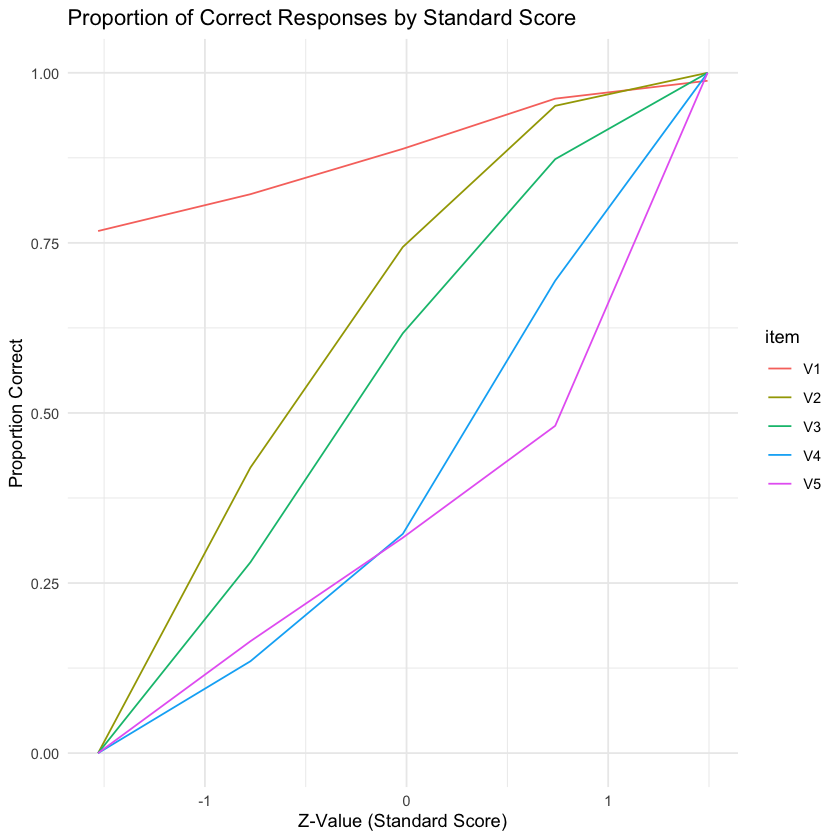

In [32]:
# Calculate the total score for each subject
math_dat$total_score <- rowSums(math_dat[, -1])

# Standardize the total scores (z-scores)
math_dat$standard_score <- scale(math_dat$total_score)

# Prepare data for plotting
plot_data <- lapply(names(math_dat)[1:5], function(item) {
    math_dat %>%
        group_by(standard_score) %>%
        summarise(proportion = mean(get(item) == 1)) %>%
        mutate(item = item)
})

plot_data <- do.call(rbind, plot_data)

# Plotting
ggplot(plot_data, aes(x = standard_score, y = proportion, group = item, color = item)) +
    geom_line() +
    labs(
        x = "Z-Value (Standard Score)", y = "Proportion Correct",
        title = "Proportion of Correct Responses by Standard Score"
    ) +
    theme_minimal()

Nell'esame di questo campione di dati reali, osserviamo un risultato in linea con le nostre aspettative: la probabilità di fornire una risposta corretta a un item cresce all'aumentare delle competenze complessive della persona. Questo andamento conferma l'ipotesi che maggiore è l'abilità generale di un individuo, maggiori sono le sue possibilità di rispondere correttamente agli item del test.

## Curva Caratteristica dell'Item

Oltre a una semplice descrizione delle tendenze osservate nelle risposte, come abbiamo già fatto, miriamo a sviluppare un modello che incorpori la nostra comprensione di come la posizione di un individuo su un continuum latente influenzi le sue risposte. La manifesta non linearità, come dimostrato nella figura precedente, suggerisce che un modello di regressione lineare non sarebbe adatto a questo scopo. Data la presenza di un pattern ogivale nelle distribuzioni cumulative, come nella distribuzione normale cumulativa o in quella logistica, è opportuno valutare l'uso di una di queste distribuzioni per la nostra modellazione. Pertanto, optiamo per la funzione logistica, grazie alla sua semplicità concettuale ed operativa. Questo metodo ci consente di tracciare la cosiddetta "curva caratteristica dell'item" (*Item Characterisric Curve*, ICC), detta anche *funzione caratteristica dell'item*, che descrive la probabilità di risposta corretta a un item specifico in relazione all'abilità latente del rispondente.

La curva caratteristica dell'item  può essere vista come un affinamento del modello di Guttman. In questo modello avanzato, la probabilità di fornire una risposta corretta a un item non subisce necessariamente un incremento improvviso da 0 a 1 al superamento di una determinata soglia di abilità. Piuttosto, tale probabilità varia in maniera più graduale, descrivendo una curva sigmoidale. Ciò offre una rappresentazione più sfumata e dettagliata del processo di risposta. 

A differenza dello scaling di Guttman, la Teoria della Risposta all'Item (IRT) propone dunque un modello statistico per descrivere l'ICC. All'interno dell'ampio spettro dei modelli IRT, il modello di Rasch si distingue per la sua semplicità. Esso assume che tutte le curve caratteristiche degli item siano parallele, condividendo la stessa inclinazione. Questo presupposto implica che la difficoltà di ogni item è l'unica variabile che influenza la forma della curva, fornendo un quadro chiaro della relazione tra la probabilità di una risposta corretta e l'abilità latente del rispondente.

Una rappresentazione grafica delle ICC di cinque item nel caso del modello di Rash è fornita nella figura successiva. L'asse orizzontale (asse x) rappresenta l'abilità latente $\theta$ dei rispondenti, mentre l'asse verticale (asse y) indica la probabilità di una risposta corretta. Le curve sigmoidali, ciascuna in un colore diverso, rappresentano i diversi item. Si noti che le curve sono parallele. Queste curve mostrano come la probabilità di rispondere correttamente a ogni item varia in funzione dell'abilità del rispondente.

In [33]:
math_dat <- rio::import("../data/deAyala/Math.txt")

# Adatta il modello di Rasch
rasch_model <- rasch(math_dat)

# Crea le curve caratteristiche degli item
plot(rasch_model, type = "ICC")

ERROR: Error in rasch(math_dat): non trovo la funzione "rasch"


La formulazione del modello di Rasch si differenzia dalla teoria classica dei test (CTT) in diversi modi cruciali. 

Nel modello di Rasch, l'analisi è condotta sia a livello di singolo item sia a livello dello strumento di misurazione nel suo complesso. Questo è in contrasto con la teoria classica dei test, dove l'analisi si concentra principalmente a livello dello strumento di misurazione nel suo complesso. Nella teoria classica dei test, il punteggio totale su uno strumento ($X$), come espresso nell'equazione $X = T + E$, è definito in termini di $T$ (abilità vera) ed $E$ (errore). Invece, nel modello di Rasch, ciò che viene modellato è la risposta all'item specifico, seguendo così la tradizione focalizzata sull'item di Guttman.

Il modello di Rasch include sia un parametro della persona sia parametri dell'item. Questo approccio rende il modello di Rasch un modello multi-livello, dove vengono considerati sia i fattori relativi all'individuo che quelli specifici di ciascun item.

Il modello di Rasch si concentra sulla modellazione della probabilità delle risposte osservate, piuttosto che sulla somma delle risposte, come avviene nella teoria classica dei test. Questo approccio rappresenta una significativa deviazione dalla CTT. Mentre la CTT si concentra sui punteggi totali e la loro distribuzione, il modello di Rasch si focalizza sulle probabilità delle risposte individuali, offrendo una comprensione più dettagliata delle prestazioni dei rispondenti e delle caratteristiche degli item.

In sintesi, il modello di Rasch fornisce un'analisi che tiene conto sia delle caratteristiche dei rispondenti sia delle proprietà degli item e si concentra sulla probabilità di ogni singola risposta piuttosto che sulla somma totale delle risposte. Assume che tutte le ICC siano parallele. Altri modelli IRT assumono invece che le ICC abbiano pendenze diverse.

## Il Modello di Rasch per Risposte Binarie

Il Modello di Rasch esplora la relazione tra l'abilità latente di un individuo ($\theta$) e le sue risposte osservate, delineando una caratteristica di curva degli item (ICC) necessariamente monotona. In questo modello, un incremento dell'abilità latente $\theta_p$ di una persona p comporta un aumento nella probabilità di fornire una risposta corretta all'item $i$. Questa relazione è descritta attraverso la funzione logit, impiegata anche nella regressione logistica:

$$ 
\text{Pr}(U_{i} = 1 \mid \theta) = \frac{e^z}{1 + e^z},
$$

dove $\text{Pr}(U_{i} = 1 \mid \theta)$ rappresenta la probabilità di una risposta corretta all'item $i$, data l'abilità latente $\theta$. La variabile $z$ è una funzione dell'abilità latente $\theta$.

Per una definizione più precisa di $z$, consideriamo come determinante la distanza tra la posizione della persona $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). Definendo quindi $z = \theta_p - \beta_i$, formuliamo un modello che predice la probabilità di una risposta corretta in funzione della posizione dell'item e della persona.

Sostituendo $\theta_p - \beta_i$ per $z$ nella funzione logistica, otteniamo:

$$ 
\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))}. 
$$ (eq-rasch-model)

Questa formula, $\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i)$, indica la probabilità che un individuo, con un livello di abilità $\theta_p$, risponda correttamente all'item $i$. Il rapporto fra l'abilità $\theta_p$ del rispondente e la difficoltà $\beta_i$ dell'item influenza direttamente tale probabilità. Più la differenza è marcata a favore dell'abilità, maggiore sarà la probabilità di una risposta corretta, riflettendo il principio che individui più abili tendono a rispondere correttamente anche agli item più difficili.

In termini semplificati, la formula stabilisce che la probabilità di fornire una risposta di tipo 1 (cioè una risposta corretta) per l'item i è funzione della distanza tra la posizione di una persona $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). Il lato destro dell'equazione converte la distanza (potenzialmente infinita) tra posizione della persona e quella dell'item in una probabilità compresa nell'intervallo [0, 1].

È importante notare che, sebbene le posizioni teoriche degli item ($\beta_i$) e delle persone ($\theta_p$) varino da $-\infty$ a $+\infty$, tipicamente esse si collocano tra -3 e +3. Nei test di competenza, le posizioni degli item sono interpretate come livelli di difficoltà. Item situati al di sotto di 0.0 sono considerati "facili" (ad esempio, sotto -2.0), mentre quelli al di sopra di 0.0 sono "difficili" (ad esempio, oltre +2.0). Gli item intorno allo 0.0 hanno una difficoltà media: quelli "facili" sono generalmente risposti correttamente da persone con abilità inferiore, mentre quelli "difficili" tendono ad essere corretti solo da coloro con abilità superiore.

## Discriminazione

Il concetto di "discriminazione" in psicometria, specialmente nel contesto del Modello di Rasch e altri modelli di risposta all'item (IRT), si riferisce alla capacità di un item di distinguere tra individui con abilità leggermente superiore e quelli con abilità leggermente inferiore rispetto alla difficoltà dell'item stesso. Questa capacità discriminante è generalmente caratterizzata dalla pendenza della curva caratteristica dell'item (ICC) "nel mezzo", ovvero per livelli di abilità vicini alla difficoltà dell'item, con discriminazioni più elevate che corrispondono a pendenze più ripide.

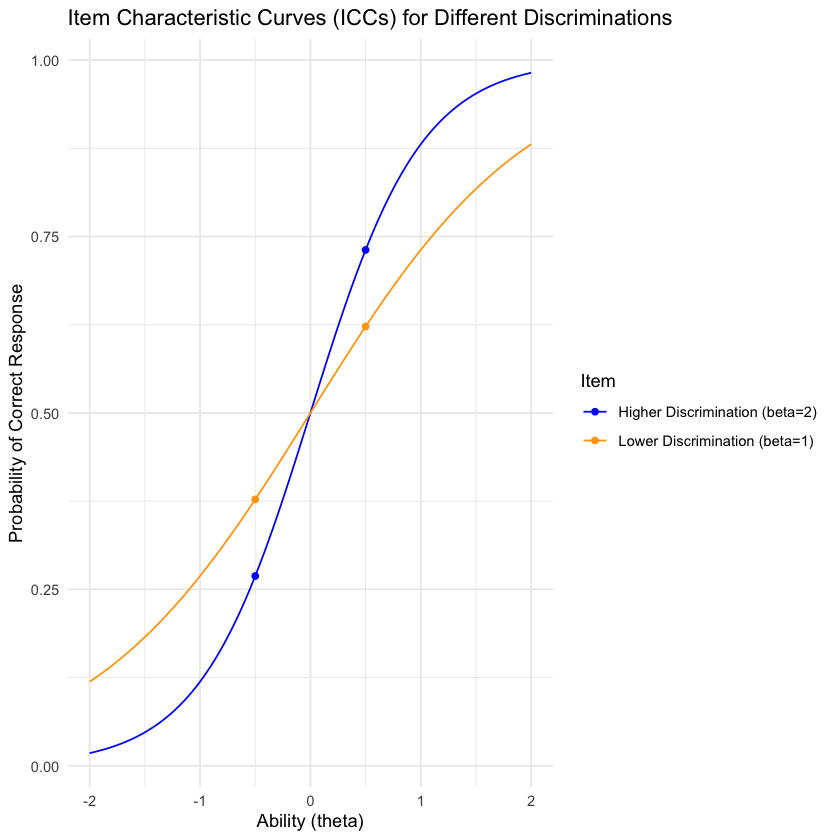

In [16]:
# Definizione della funzione sigmoide per rappresentare le ICC
sigmoid <- function(x, beta) {
    1 / (1 + exp(-beta * (x - 0)))
}

# Creazione di una sequenza di livelli di abilità
abilities <- seq(-2, 2, length.out = 100)

# Calcolo delle probabilità per due item con diversi valori di discriminazione
# Per l'item di sinistra (discriminazione inferiore, beta=1)
probabilities_left <- sigmoid(abilities, beta = 1)

# Per l'item di destra (discriminazione superiore, beta=2)
probabilities_right <- sigmoid(abilities, beta = 2)

# Creazione del dataframe per ggplot
data <- data.frame(
    Ability = rep(abilities, 2),
    Probability = c(probabilities_left, probabilities_right),
    Item = rep(c("Lower Discrimination (beta=1)", "Higher Discrimination (beta=2)"), each = 100)
)

# Creazione del grafico
ggplot(data, aes(x = Ability, y = Probability, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "orange")) +
    geom_point(
        data = data.frame(
            Ability = c(-0.5, 0.5, -0.5, 0.5),
            Probability = c(sigmoid(-0.5, 1), sigmoid(0.5, 1), sigmoid(-0.5, 2), sigmoid(0.5, 2)),
            Item = c("Lower Discrimination (beta=1)", "Lower Discrimination (beta=1)", "Higher Discrimination (beta=2)", "Higher Discrimination (beta=2)")
        ),
        aes(x = Ability, y = Probability, color = Item)
    ) +
    ggtitle("Item Characteristic Curves (ICCs) for Different Discriminations") +
    xlab("Ability (theta)") +
    ylab("Probability of Correct Response") +
    theme_minimal()


Consideriamo due diverse ICC per items con difficoltà zero. Le probabilità che persone con abilità di −0.5 e +0.5 risolvano correttamente l'item sono approssimativamente 0.38 e 0.62 per l'item di sinistra e 0.27 e 0.73 per quello di destra. Questo significa che due persone con una differenza di 1 nella loro abilità mostrano una differenza di 0.24 nella loro probabilità di risolvere correttamente l'item di sinistra e una differenza di 0.46 per l'item di destra.

La pendenza al centro dell'ICC, dove è praticamente lineare, può essere approssimata da questa differenza sull'asse y divisa per la differenza sull'asse x come 0.24 per l'item rappresentato dalla curva blu e 0.46 per quello rappresentato dalla curva arancione, rispettivamente. In termini più semplici, la pendenza è una misura di quanto rapidamente la probabilità di risposta corretta aumenta (o diminuisce) in relazione a un cambiamento nell'abilità dell'individuo. Una pendenza più ripida (come nell'item "blu") indica una maggiore discriminazione, ovvero l'item è più efficace nel distinguere tra persone con abilità leggermente differenti.

Nel Modello di Rasch, si assume che tutti gli item abbiano la stessa discriminazione, con una pendenza di 1. Questo è evidente dalla formula del modello, dove l'unico parametro per ciascun item $i$ è la sua difficoltà $\beta_i$, senza parametri aggiuntivi per modellare la discriminazione. Tuttavia, questo approccio è spesso considerato troppo rigido dal punto di vista della modellazione, poiché molti test reali contengono item con discriminazioni disuguali. In contrasto, il modello logistico a due parametri (2PL) di Birnbaum incorpora un parametro di pendenza, permettendo a ciascun item di avere una discriminazione diversa. 

In sintesi, la discriminazione in un test psicometrico è un concetto chiave che descrive quanto efficacemente un item può differenziare tra rispondenti con abilità simili ma non identiche. Maggiore è la discriminazione, più efficacemente l'item può identificare le differenze sottili nelle abilità dei rispondenti.

## La funzione Logistica

Il Modello di Rasch impiega la funzione logistica per correlare abilità e difficoltà con la probabilità di una risposta corretta. La funzione logistica è solitamente definita come:

$$ f(x) = \frac{\exp(x)}{1 + \exp(x)} $$

Possiamo ottenere il Modello di Rasch sostituendo $ \theta_p - \beta_i $ per $ x $ in questa equazione. Questo significa che possiamo calcolare la probabilità di una risposta corretta nel Modello di Rasch applicando la funzione logistica alla differenza tra $ \theta_p $ e $ \beta_i $, ovvero $ \text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = f(\theta_p - \beta_i) $. La funzione logistica trasforma i logit, o log-odds, in probabilità.

Le quote esprimono la probabilità relativa di una risposta corretta rispetto a una risposta errata, e il cosiddetto logit è il logaritmo naturale delle quote. Ad esempio, quote di tre indicano che una risposta corretta è tre volte più probabile di una risposta errata, mentre quote di 1/3 indicano che una risposta corretta è tre volte meno probabile di una risposta errata. Se la probabilità di una risposta corretta è data da $ \pi $, la probabilità di una risposta errata è $ 1-\pi $, e le quote sono $ O = \frac{\pi}{1-\pi} $. Qualsiasi quota $ O $ corrisponde a un unico logit $ \log(O) $ e a una unica probabilità $ \pi $. Questo ci permette di definire il Modello di Rasch usando il logit, che è un'alternativa all'uso della probabilità, come abbiamo fatto sopra. Per un parametro di abilità $ \theta_p $ e un parametro di difficoltà $ \beta_i $, si può dimostrare che i log-odds sono $ \theta_p - \beta_i $. Questo porta alla forma logit del Modello di Rasch:

Questo porta alla forma logit del modello di Rasch,

$$ \log \left( \frac{\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)}{\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)} \right) = \theta_p - \beta_i. $$ (eq-rasch-logit)

Possiamo dimostrarlo come segue. Come notato sopra, le quote sono definite per essere $ O = \frac{\pi}{1 - \pi} $ per il modello di Rasch, dove

$$ \pi = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. $$

Come deriveremo in dettaglio nella Sezione {ref}`sec-rasch-prob-risp-errata`,

$$ 1 - \pi = 1 - \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

Sostituendo questi termini nella definizione di $ O $ e cancellando i termini comuni otteniamo

$$ O = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \exp(\theta_p - \beta_i). $$

Quindi,

$$ \log(O) = \theta_p - \beta_i. $$

Questa equazione dimostra che, nella scala dei logit, la probabilità di fornire una risposta corretta all'item i è direttamente proporzionale alla differenza tra il livello di abilità $ \theta_p $ del rispondente e la difficoltà dell'item $ \beta_i $. Una maggiore differenza tra $ \theta_p $ e $ \beta_i $ implica una più alta probabilità di risposta corretta, $ \text{Pr}(U_{pi} = 1 \mid \theta_p) = 1 $, in confronto alla probabilità di una risposta errata. Di conseguenza, valori elevati sulla scala dei logit indicano una discrepanza significativa a favore dell'abilità del rispondente rispetto alla difficoltà dell'item, e quindi una maggiore probabilità di ottenere una risposta corretta.

Un ulteriore vantaggio della forma logit è che offre una semplice interpretazione di $ \theta_p - \beta_i $ come il logit della probabilità che la persona $p$ risponda correttamente all'item $i$. Questo significa che il logit è lineare in $ \theta_p $, con intercetta y pari a $ -\beta_i $ e pendenza uno. La figura seguente dimostra ciò per due item $i$ e $j$ con difficoltà $ \beta_i = -1 $ e $ \beta_j = 1 $. Vediamo che le due linee sono parallele, una conseguenza dell'avere la stessa pendenza. L'unica differenza tra le linee è dove esse intersecano l'asse y: $ -\beta_i $ nel caso dell'item $i$, e $ -\beta_j $ nel caso dell'item $j$. In questa rappresentazione, è direttamente visibile che le ICC del Modello di Rasch sono parallele, mentre sulla scala delle probabilità ciò è evidente solo nella loro sezione centrale (sebbene si possa notare che esse non si incrociano).

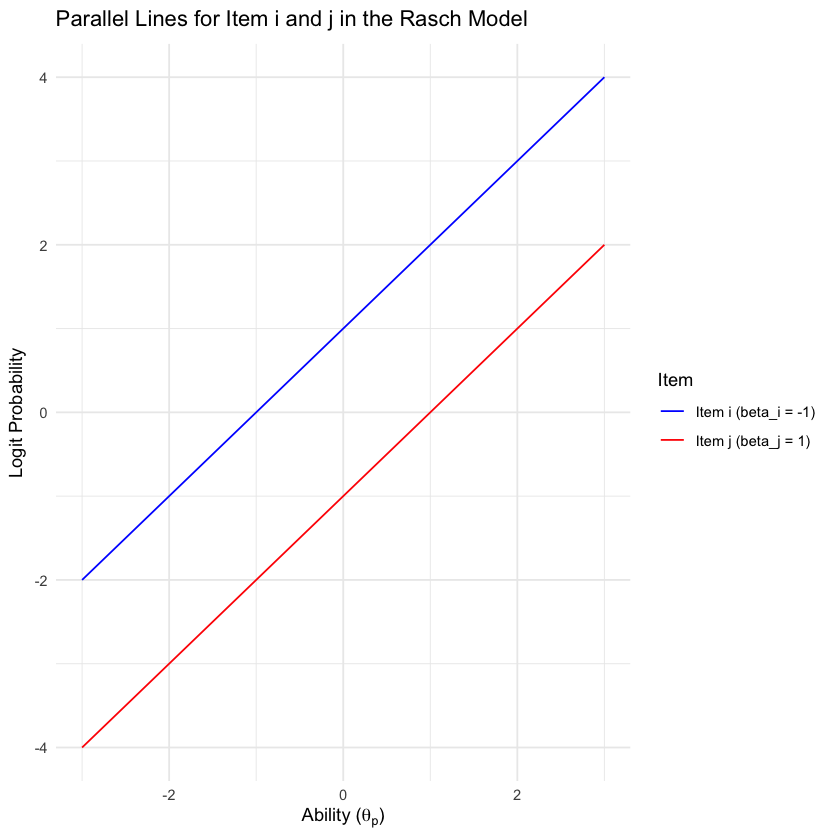

In [22]:
# Creazione di un dataframe con i valori di abilità (theta_p) e le difficoltà degli item (beta)
theta_p <- seq(-3, 3, length.out = 100)
beta_i <- -1
beta_j <- 1

# Calcolo dei logit per gli item i e j
logit_i <- theta_p - beta_i
logit_j <- theta_p - beta_j

# Creazione del dataframe per il plot
data <- data.frame(
    Ability = c(theta_p, theta_p),
    Logit = c(logit_i, logit_j),
    Item = factor(c(rep("Item i (beta_i = -1)", length(theta_p)), rep("Item j (beta_j = 1)", length(theta_p))))
)

# Creazione del grafico
ggplot(data, aes(x = Ability, y = Logit, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "red")) +
    ggtitle(TeX("Parallel Lines for Item i and j in the Rasch Model")) +
    xlab(TeX("Ability ($\\theta_p$)")) +
    ylab(TeX("Logit Probability")) +
    theme_minimal()

Il fatto che le due linee siano parallele significa che la differenza tra il logit della probabilità di rispondere correttamente all'item $i$ e il logit della probabilità di rispondere correttamente all'item $j$ è la stessa per ogni livello di abilità. Questo è un modo per comprendere l'oggettività specifica, una proprietà importante del Modello di Rasch che discuteremo in seguito.

(sec-rasch-prob-risp-errata)=
## Probabilità di una Risposta Errata

Il modello di Rasch non ammette il credito parziale. Pertanto, $ U_{pi} $ è o zero o uno per ogni persona e item del test, e le probabilità di questi due possibili esiti devono sommarsi a uno, il che significa 

$$ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) + \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1. $$

Risolvendo per $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $, otteniamo

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1 - \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = 1 - \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} $$

dopo aver sostituito l'eq. {eq}`eq-rasch-logit` per $ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) $. Possiamo semplificare l'ultima espressione espandendo il 1 per ottenere

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = \frac{1 + \exp(\theta_p - \beta_i) - \exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

## Probabilità di una Risposta Arbitraria

In questa sezione, calcoleremo la probabilità di una risposta arbitraria $\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i)$, che combina espressioni separate per $\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)$ e $\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)$ in un'unica formula. Avere una singola espressione è utile per scrivere le probabilità dei pattern di risposta e delle intere matrici di dati. Per il modello di Rasch, questa espressione è

$$ 
\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i) = \frac{\exp\{u_{pi} \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)}, 
$$ (eq-rasch-2-3)

dove rimane aperta la questione se $ u_{pi} $ assumerà il valore zero o uno.

Possiamo verificare che le due equazioni separate per entrambi i casi siano coperte dall'Eq. {eq}`eq-rasch-2-3` sostituendo ciascuno dei due possibili valori di $ u_{pi} $. Quando $ u_{pi} = 1 $, l'espressione si riduce a

$$ \frac{\exp\{1 \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)} = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}, $$

che è la probabilità di una risposta corretta.

Quando $ u_{pi} = 0 $ si ottiene

$$ 
\frac{\exp\{0 \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)} = \frac{\exp(0)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}, 
$$

che è la probabilità di una risposta errata, poiché $ \exp(0) = 1 $.

Quindi, l'Eq. {eq}`eq-rasch-2-3` fornisce effettivamente un modo per calcolare la probabilità di entrambi i tipi di risposte (corretta o errata) in base al valore di $ u_{pi} $, rendendola una formula versatile per il modello di Rasch.

In alcune letterature, in particolare nella letteratura relativa all'IRT bayesiana, viene utilizzata un'espressione combinata differente. Questa espressione si basa sulla distribuzione di Bernoulli, così chiamata in onore del matematico svizzero Jacob Bernoulli. La distribuzione di Bernoulli fornisce le probabilità di qualsiasi variabile casuale con due esiti, come le risposte nel modello di Rasch. Ha un singolo parametro, che indica la probabilità che la variabile casuale sia uno. Per il modello di Rasch, questo parametro è

$$ 
\pi_{pi} = \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

Dato $ \pi_{pi} $, la probabilità di risposta $ u_{pi} $ è

$$ 
\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i) = \pi_{pi}^{u_{pi}} \cdot (1 - \pi_{pi})^{1-u_{pi}}. 
$$ (eq-rasch-2-4)

La base del secondo termine, $ 1-\pi_{pi} $, è uguale alla probabilità di una risposta errata $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $. Così, la probabilità di una risposta corretta è elevata alla potenza $ u_{pi} $, mentre la probabilità di una risposta errata è elevata alla potenza $ 1 - u_{pi} $. 

Questa espressione è davvero solo un trucco notazionale che sfrutta il fatto che $ a^0 = 1 $ per qualsiasi $ a $. I termini $ u_{pi} $ e $ 1-u_{pi} $ agiscono come interruttori. Quando $ u_{pi} = 1 $, $ 1-u_{pi} = 0 $, quindi la probabilità di una risposta corretta è attivata mentre la probabilità di una risposta errata è disattivata essendo impostata a uno. Possiamo vedere questo meccanismo nelle equazioni sostituendo 1 per $ u_{pi} $. Questo dà $ \pi_{pi}^{1} \cdot (1-\pi_{pi})^{1-1} = \pi_{pi}^{1} \cdot (1-\pi_{pi})^{0} = \pi_{pi} \cdot 1 = \pi_{pi} $. Impostando $ u_{pi} = 0 $, gli interruttori si invertono: la probabilità di una risposta corretta è disattivata, mentre quella di una risposta errata è attivata. 

Un vantaggio dell'uso dell'eq. {eq}`eq-rasch-2-4` per descrivere il modello di Rasch è che non dipende dalla forma specifica dell'ICC. Nella teoria classica del Modello di Rasch, la Curva Caratteristica dell'Item (ICC) descrive la probabilità di una risposta corretta in funzione dell'abilità del rispondente e della difficoltà dell'item. Questa curva ha una forma specifica determinata dalla formulazione matematica del modello di Rasch. L'eq. {eq}`eq-rasch-2-4`, basata sulla distribuzione di Bernoulli, non è vincolata a una specifica forma dell'ICC del modello di Rasch. In altre parole, questa formulazione è più flessibile e può adattarsi a modelli diversi dal modello di Rasch standard, come il modello 1PNO, pur mantenendo la sua validità. Il modello 1PNO (One-Parameter Normal Ogive) è un altro modello nella teoria della risposta all'item. Anche se ha delle somiglianze con il modello di Rasch, utilizza una formulazione diversa per la probabilità di una risposta corretta. Utilizzando l'equazione Bernoulli (eq. {eq}`eq-rasch-2-4`), è possibile creare un'equazione unificata che può descrivere le probabilità di risposta sia nel modello di Rasch che nel modello 1PNO. Questo viene fatto definendo $ \pi_{pi} $ (la probabilità di successo in un'item per un individuo) secondo la formulazione specifica del modello 1PNO anziché quella del modello di Rasch.

Un secondo vantaggio è che ci permette di usare una scorciatoia statistica per nascondere i suoi dettagli matematici in molte situazioni. Quando vogliamo dire che la variabile casuale $ U_{pi} $ segue una distribuzione di Bernoulli con parametro $ \pi_{pi} $, è comune scrivere $ U_{pi} \sim \text{Bernoulli}(\pi_{pi}) $. Il simbolo "∼" può essere letto come "è distribuito come". In questa notazione, che è comune nell'IRT bayesiano, possiamo scrivere il modello di Rasch come

$$ 
U_{pi} \sim \text{Bernoulli}(\pi_{pi}), \quad \pi_{pi} = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

## Rappresentazione Alternativa della Funzione Logistica

La funzione logistica utilizzata nel modello di Rasch può essere scritta in due modi: con la funzione esponenziale sia al numeratore sia al denominatore, come facciamo nella maggior parte del libro (a sinistra), oppure equivalentemente con la funzione esponenziale solo al denominatore, seguita dal suo argomento negativo (a destra):

$$ 
\frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))} 
$$

Per dimostrare l'equivalenza delle due espressioni della funzione logistica nel modello di Rasch, seguiamo i seguenti  passaggi algebrici. Per semplificare il lato destro, utilizziamo la proprietà dell'esponenziale che afferma $ e^{-x} = \frac{1}{e^x} $. Quindi, riscriviamo $ \exp(-(\theta_p - \beta_i)) $ come $ \frac{1}{\exp(\theta_p - \beta_i)} $:

   $$ \frac{1}{1 + \frac{1}{\exp(\theta_p - \beta_i)}} $$

Il denominatore del lato destro diventa $ 1 + \frac{1}{\exp(\theta_p - \beta_i)} $. Per combinare i termini nel denominatore, otteniamo un denominatore comune:

   $$ \frac{1}{\frac{\exp(\theta_p - \beta_i) + 1}{\exp(\theta_p - \beta_i)}} $$

Simplificando ulteriormente, il denominatore diventa $ \exp(\theta_p - \beta_i) + 1 $, quindi l'intera espressione diventa:

   $$ \frac{1}{\exp(\theta_p - \beta_i) + 1} $$

Possiamo ora invertire la frazione per ottenere il lato sinistro dell'equazione originale:

   $$ \frac{\exp(\theta_p - \beta_i)}{\exp(\theta_p - \beta_i) + 1} $$

Quindi, abbiamo dimostrato che il lato sinistro e il lato destro dell'equazione originale sono effettivamente equivalenti.

## Il Modello di Rasch e l'Analisi Fattoriale

Per una migliore comprensione del Modello di Rasch, è utile confrontarlo con l'Analisi Fattoriale. Nonostante le loro differenze come metodologie statistiche, entrambi cercano un obiettivo comune: comprendere le dimensioni latenti sottostanti alle risposte osservate nei dati. Questo parallelo aiuta a mettere in luce le somiglianze e le differenze tra i due approcci.

Nell'Analisi Fattoriale, il modello tipico è espresso come $Y_i = \lambda_i \xi + \delta_i$, dove $Y_i$ è il punteggio osservato per l'item i-esimo, $\lambda_i$ rappresenta la saturazione fattoriale che indica quanto l'item è influenzato dal fattore latente $\xi$, e $\delta_i$ è il termine di errore specifico per quell'item. L'idea centrale è che, controllando per $\xi$, le correlazioni tra gli item $Y_i$ diventano nulle, poiché qualsiasi associazione comune è spiegata dal fattore latente.

D'altra parte, il Modello di Rasch adotta un approccio leggermente diverso, ma con lo stesso obiettivo fondamentale: identificare e gestire l'influenza di una dimensione latente (spesso chiamata abilità) sulle risposte agli item. In questo contesto, si considerano risposte dicotomiche (0 o 1), e si presume che la probabilità di una risposta corretta a un item sia una funzione logistica dell'abilità del rispondente $\theta$ e della difficoltà dell'item $\delta_i$.

La principale differenza tra il Modello di Rasch e l'Analisi Fattoriale risiede nella formulazione dei parametri. Mentre l'Analisi Fattoriale stima le saturazioni fattoriali per ciascun item, il Modello di Rasch assume che tutti gli item abbiano lo stesso potere discriminante, cioè sono ugualmente efficaci nel distinguere tra rispondenti con diversi livelli di abilità. Invece di concentrarsi sulle saturazioni fattoriali, il Modello di Rasch si concentra sulla stima dell'abilità dei rispondenti $\theta$ e sulla difficoltà degli item $\delta_i$, presupponendo che gli item siano equivalenti in termini di discriminazione.

In conclusione, sia il Modello di Rasch che l'Analisi Fattoriale mirano a isolare e controllare l'effetto di una dimensione latente sull'associazione tra gli item, cercando di spiegare le risposte osservate attraverso questa dimensione. Mentre l'Analisi Fattoriale si concentra sulla stima delle saturazioni fattoriali e sull'identificazione di fattori latenti comuni tra gli item, il Modello di Rasch si focalizza sulla stima dell'abilità dei rispondenti e sulla difficoltà degli item, fornendo un quadro più specifico e dettagliato delle dinamiche che influenzano le risposte agli item.

## Assunzioni Fondamentali del Modello di Rasch

Il modello di Rasch si fonda su tre assunzioni essenziali che sono cruciali per la sua validità e applicabilità: unidimensionalità, monotonicità e indipendenza locale. 

1. **Unidimensionalità**: Questa assunzione stabilisce che un singolo tratto latente, o dimensione di attributo di una persona, predomina nell'influenzare la probabilità di risposta agli item. In pratica, ciò significa che le risposte agli item di un test sono determinate principalmente da una sola caratteristica o abilità latente. Se fossero presenti più dimensioni, il modello non sarebbe più unidimensionale e la rappresentazione grafica necessiterebbe di una struttura tridimensionale.

2. **Monotonicità**: Secondo questa assunzione, all'aumentare del valore dell'attributo latente (indicato con $ \theta $), aumenta anche la probabilità di una risposta corretta. Questo principio è intuitivo in ambito di misurazione: ci si aspetta che rispondenti con un livello più elevato dell'attributo latente tendano a ottenere punteggi più alti nel test.

3. **Indipendenza Locale**: Dopo aver controllato per il tratto latente, qualsiasi correlazione tra le risposte a due item differenti dovrebbe annullarsi. Ciò implica che eventuali associazioni osservate tra le risposte a diversi item sono attribuibili esclusivamente al tratto latente misurato. In altre parole, una volta controllato per il tratto latente, la risposta a un item non dovrebbe essere influenzata né influenzare la risposta a un altro item.

La violazione di una qualsiasi di queste assunzioni suggerisce che potrebbe essere necessario adottare metodologie più complesse o approcci alternativi per analizzare i dati. In tali casi, potrebbe essere richiesto un esame più approfondito dei dati o l'impiego di modelli più avanzati che possano gestire meglio la complessità dei dati osservati.

## Oggettività Specifica 

Un'importante caratteristica del modello di Rasch è la sua capacità di stimare la difficoltà degli item, indipendentemente dalle abilità dei partecipanti. Questo concetto è noto come "oggettività specifica".

Nel modello di Rasch, la difficoltà di ciascun item viene determinata attraverso un metodo chiamato "stima di massima verosimiglianza condizionale". Questo metodo consente di valutare la difficoltà degli item senza che questa stima sia influenzata dalle capacità specifiche dei rispondenti. In altre parole, la difficoltà di ogni item viene calcolata in modo indipendente, basandosi esclusivamente sulle risposte a quel particolare item, senza essere alterata dal livello generale di abilità dei partecipanti al test.

Questa proprietà del modello di Rasch è simile a ciò che avviene in una analisi di regressione, dove la pendenza e l'intercetta di una retta di regressione non cambiano a seconda del campione analizzato. Analogamente, nel modello di Rasch, i parametri di difficoltà degli item rimangono costanti e non vengono influenzati dalle competenze generali dei rispondenti. Questo significa che le valutazioni della difficoltà degli item sono stabili e affidabili, indipendentemente dalla varietà o dal livello generale di abilità del campione di rispondenti.

L'oggettività specifica è particolarmente importante perché elimina la necessità di avere campioni di rispondenti normati o rappresentativi della popolazione generale. In pratica, quasi qualsiasi gruppo di persone può essere utilizzato per stabilire la difficoltà degli item, a condizione che ci sia una varietà sufficiente nelle loro risposte. Questo contrasta con l'approccio dei test convenzionali, dove è spesso necessario selezionare un campione rappresentativo e utilizzare le risposte per creare tabelle normative basate sulle percentuali di risposte corrette. 

## Un'Applicazione Concreta

Esaminiamo ora un'applicazione concreta del modello di Rasch. Anche se in questo tutorial ci concentreremo sul pacchetto `mirt`, esistono diversi pacchetti R per stimare i modelli IRT. Tra i più comuni vi sono `ltm`, `eRm` e `TAM`. Caricheremo inoltre il pacchetto `ggmirt`, che rappresenta un'estensione di `mirt` e, tra le varie funzioni per creare grafici e per facilitare la valutazione dell'adattamento del modello, include una funzione per simulare dati per le analisi IRT. Creiamo dunque un set di dati con 500 osservazioni e 10 item.

In [4]:
set.seed(42)
d <- sim_irt(500, 10, discrimination = .25, seed = 42)
head(d)

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
i Using compatibility `.name_repair`.
i The deprecated feature was likely used in the ggmirt package.
  Please report the issue to the authors."


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,1,0,1,1,1,0,1
0,1,1,0,0,0,0,0,0,1
0,1,0,1,0,1,0,1,0,0
0,0,1,0,0,1,0,0,0,1
0,1,1,1,0,0,1,1,1,0
0,0,1,0,0,0,0,1,0,1


Immaginiamo di aver somministrato un test (ad esempio, un test di conoscenza, un esame, ecc.) a 500 persone. Ogni "partecipante" ha risposto a 10 item binari.  Un punteggio di 1 significa che la persona ha risposto correttamente a una determinata domanda/item. Un punteggio di 0 indica invece che la persona ha risposto erroneamente a quell'item.

Per adattiamo il modello di Rash ai dati usiamo la funzione `mirt()`.

In [6]:
fit_rasch <- mirt(d, 1, itemtype = "Rasch", verbose = FALSE)
fit_rasch


Call:
mirt(data = d, model = 1, itemtype = "Rasch", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 20 EM iterations.
mirt version: 1.41 
M-step optimizer: nlminb 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2746.893
Estimated parameters: 11 
AIC = 5515.786
BIC = 5562.147; SABIC = 5527.232
G2 (1012) = 514.28, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

L'oggetto creato è di classe "SingleGroupClass" e contiene tutte le informazioni e i dati necessari per valutare il modello. Eseguendo l'oggetto, otteniamo informazioni sul tipo di stima e alcuni indici di adattamento del modello (inclusi AIC e BIC), utili per confrontare diversi modelli tra loro.

## Comprendere i Parametri

Abbiamo visto come un'analisi IRT può essere paragonata a un'analisi fattoriale. Utilizzando la funzione `summary()`, otteniamo quella che viene definita soluzione fattoriale, che include i carichi fattoriali (F1) e le comunalità (h2). Le comunalità, essendo carichi fattoriali al quadrato, sono interpretate come la varianza spiegata in un item dal tratto latente. Nel caso presente, tutti gli item hanno una relazione sostanziale (saturazioni > .50) con il tratto latente, indicando che il tratto latente è un buon indicatore della varianza osservata in quegli item. Questo suggerisce che il tratto latente è in grado di spiegare una porzione significativa della varianza nei punteggi degli item.

In [7]:
summary(fit_rasch)

       F1   h2
V1  0.557 0.31
V2  0.557 0.31
V3  0.557 0.31
V4  0.557 0.31
V5  0.557 0.31
V6  0.557 0.31
V7  0.557 0.31
V8  0.557 0.31
V9  0.557 0.31
V10 0.557 0.31

SS loadings:  3.102 
Proportion Var:  0.31 

Factor correlations: 

   F1
F1  1


Nell'IRT, tuttavia, siamo generalmente più interessati ai parametri specifici IRT (discriminazione e difficoltà). Questi parametri possono essere estratti dall'oggetto creato da `mirt()` nel seguente modo:

In [8]:
params_rasch <- coef(fit_rasch, IRTpars = TRUE, simplify = TRUE)
round(params_rasch$items, 2) # g = c = guessing parameter

,a,b,g,u
V1,1,1.67,0,1
V2,1,-0.62,0,1
V3,1,0.37,0,1
V4,1,0.80,0,1
V5,1,0.59,0,1
V6,1,-0.17,0,1
V7,1,2.30,0,1
V8,1,0.02,0,1
V9,1,3.14,0,1
V10,1,-0.07,0,1


1. **a (Discriminazione)**: Il parametro $a$ (discriminazione) rappresenta la pendenza delle curve caratteristiche degli item (ICC - Item Characteristic Curves). In termini più specifici:
   - Una **pendenza elevata** (valore alto di $a$) indica che l'item è molto efficace nel distinguere tra individui con livelli diversi del tratto latente (ad esempio, abilità). Questo significa che piccole variazioni nel tratto latente portano a grandi cambiamenti nella probabilità di rispondere correttamente all'item.
   - Una **pendenza bassa** (valore basso di $a$) suggerisce che l'item non è altrettanto efficace nel discriminare tra livelli diversi del tratto latente. In questo caso, anche ampie variazioni nel tratto latente comportano solo piccoli cambiamenti nella probabilità di risposta corretta.
   - Nel modello IRT a un parametro (1PL), come il modello di Rasch, si assume che tutti gli item abbiano la stessa pendenza (o potere discriminante), e quindi tutti i valori di $a$ sono fissati allo stesso valore (di solito 1). 

2. **b (Difficoltà)**: Rappresenta il livello di abilità a cui un rispondente ha il 50% di probabilità di rispondere correttamente all'item. Un valore positivo indica un item più difficile (richiede un livello di abilità superiore per rispondere correttamente), mentre un valore negativo indica un item più facile. Ad esempio, V7 ha un valore di difficoltà di 2.30, il che significa che è relativamente difficile, mentre V2, con un valore di -0.62, è relativamente facile.

3. **g (Probabilità di Indovinare)**: In questo modello, la probabilità di indovinare è impostata a zero per tutti gli item, il che è coerente con il modello di Rasch, dove non si considera la possibilità di indovinare correttamente un item per caso.

## Modello ad Un Parametro

Il modello ad un parametro è formulato nel modo seguente:

$$ 
\begin{equation}
P(X_i = 1 \mid \theta_v, \alpha, \delta_i) = \frac{\exp(\alpha(\theta_v - \delta_i))}{1 + \exp(\alpha(\theta_v - \delta_i))} = \frac{1}{1 + \exp(-\alpha(\theta_v - \delta_i))},
\end{equation}
$$ (eq-1pl-model)

dove $\alpha$ rappresenta la pendenza delle ICC. L'assenza di un pedice significa che $\alpha$ non varia tra gli item. 

Nel contesto del modello IRT (Teoria della Risposta all'Item) a un parametro, il parametro $\alpha$ è collegato alla pendenza della Funzione di Risposta all'Item (IRF). Esso riflette quanto bene un item è in grado di discriminare tra individui situati in punti diversi lungo il continuum. Di conseguenza, $\alpha$ è noto come il parametro di discriminazione dell'item.

Per facilitare la comprensione, supponiamo di avere tre item con diversi valori di $\alpha$, tutti posizionati a $0.0$ (cioè, $\delta_1 = \delta_2 = \delta_3 = 0$). I nostri tre parametri di discriminazione sono $0$, $1$ e $2$. Inoltre, abbiamo un rispondente A situato a $-1$ ($\theta_A = -1$) e un altro rispondente B situato a $1$ (cioè, $\theta_B = 1$). Per l'item con $\alpha = 0.0$, la nostra IRF e la linea di regressione logit sono orizzontali. Di conseguenza, la probabilità prevista di una risposta di tipo 1 per entrambi i rispondenti è $0.5$:

$$
P(X_i = 1 \mid \theta, \delta_i) = 0.5.
$$

In questo caso, l'item non fornisce alcuna informazione utile per differenziare tra i due rispondenti. Questa mancanza di potere discriminatorio è una funzione diretta di $\alpha = 0.0$.

Al contrario, con il secondo item ($\alpha = 1$) abbiamo previsioni diverse per i nostri rispondenti:

$$
P(X_i = 1 \mid \theta, \delta_i) = \frac{1}{1 + e^{-(\theta - \delta_i)}}.
$$

Per il rispondente A la probabilità $p_2 = 0.2689$ e per il rispondente B $p_2 = 0.7311$. Pertanto, il parametro $\alpha$ di questo item ci permette di distinguere tra i due rispondenti.

Sviluppando ulteriormente questa idea, troviamo che il terzo item ($\alpha = 2.0$) avrebbe l'ICC (e la linea di regressione logit) più ripida dei tre item. Questa ripidità si riflette in una maggiore differenza nelle probabilità previste per i nostri rispondenti rispetto ai due item precedenti:

$$
P(X_i = 1 \mid \theta, \delta_i) = \frac{1}{1 + e^{-2(\theta - \delta_i)}}.
$$

Ovvero, per questo item il rispondente A ha una probabilità $p_3 = 0.1192$ e per il rispondente B $p_3 = 0.8808$. In breve, l'entità della differenza in queste probabilità previste è una funzione diretta del parametro $\alpha$ dell'item. Pertanto, gli item con $\alpha$ maggiori (cioè con linee di regressione logit e IRF più ripide) discriminano meglio tra i rispondenti situati in punti diversi del continuum rispetto agli item con $\alpha$ minori.

In sintesi, maggiore è il valore di $\alpha$, più ripida sarà la curva ICC e maggiore sarà la discriminazione tra individui con diversi livelli di abilità $\theta$.

### Modello di Rasch e Modello 1PL

Per riassumere, sia il modello 1PL che il modello di Rasch richiedono che gli item abbiano un parametro $\alpha$ costante, ma permettono che gli item differiscano nelle loro posizioni. Nel modello di Rasch, questo parametro costante è fissato a $1.0$, mentre nel modello 1PL, $\alpha$ non deve necessariamente essere uguale a $1.0$. Matematicamente, i modelli 1PL e Rasch sono equivalenti e i valori di un modello possono essere trasformati nell'altro attraverso una riscalatura appropriata. 

Tuttavia, per alcuni, il modello di Rasch rappresenta una prospettiva filosofica diversa da quella incarnata nel modello 1PL. Il modello 1PL si concentra sull'adattare i dati nel miglior modo possibile, data la struttura del modello. Al contrario, il modello di Rasch viene utilizzato per costruire la variabile di interesse (cfr. Andrich, 1988; Wilson, 2005; Wright, 1984; Wright & Masters, 1982; Wright & Stone, 1979). In breve, questa prospettiva sostiene che il modello di Rasch sia lo standard secondo il quale si può creare uno strumento per misurare una variabile. Questa visione è analoga a ciò che avviene nelle scienze fisiche. Ad esempio, consideriamo la misurazione del tempo. La misurazione del tempo implica un processo ripetitivo che segna incrementi uguali (cioè, unità) della variabile latente del tempo. Per misurare il tempo, dobbiamo definire la nostra unità (ad esempio, un periodo standard di oscillazione). Con il modello di Rasch, l'unità è definita come il logit, ossia la distanza sul nostro continuum che porta a un aumento del rapporto di successo di un fattore uguale alla costante trascendentale $e$. Pertanto, analogamente alla misurazione del tempo, le nostre misurazioni con un modello a un parametro si basano sull'uso (ripetitivo) di un'unità che rimane costante nella nostra metrica. 

Per semplicità, nel seguito utilizzeremo il termine generale modello 1PL per riferirci sia alla situazione in cui $\alpha = 1.0$ (cioè, il modello di Rasch) sia alla situazione in cui $\alpha$ è uguale a qualche altra costante. Tuttavia, quando usiamo il termine modello di Rasch, ci riferiamo alla situazione in cui $\alpha = 1.0$ e a una filosofia di misurazione che afferma che il modello di Rasch sia la base per costruire la variabile di interesse.

## Stima dei parametri

Consideriamo ora la procedura di stima della posizione (o livello di abilità) di un individuo nel modello di Rasch attraverso l'uso della massima verosimiglianza. La procedura per stimare la posizione di un individuo, dato un particolare pattern di risposte, può essere formulata con i seguenti passaggi:

1. **Selezione del Pattern di Risposta**: Consideriamo un pattern di risposta arbitrario, come "11000", che indica due risposte corrette seguite da tre errate, con un totale di $X = 2$ risposte corrette.

2. **Calcolo delle Probabilità per Ogni Risposta**: Utilizziamo l'Eq. {eq}`eq-rasch-model` per calcolare la probabilità di ciascuna risposta nel pattern, in base a un dato livello di abilità $\theta$.

3. **Determinazione della Probabilità del Pattern di Risposta**: Questo passaggio si basa sull'assunzione di indipendenza condizionale (ovvero, per un dato $\theta$, le risposte sono indipendenti l'una dall'altra). Questa assunzione ci permette di applicare la regola di moltiplicazione per eventi indipendenti alle probabilità degli item per ottenere la probabilità complessiva del pattern di risposta per un dato $\theta$.

4. **Ripetizione dei Calcoli per Diversi Valori di $\theta$**: Ripetiamo i passaggi 1 e 2 per una serie di valori di $\theta$. Nel nostro esempio, il range di $\theta$ va da $-3$ a $3$.

5. **Determinazione del Valore di $\theta$ con la Massima Verosimiglianza**: L'ultimo passaggio consiste nel determinare quale valore di $\theta$ tra quelli calcolati nel passaggio 3 abbia la più alta probabilità di produrre il pattern "11000".

Di seguito, uno script in R che implementa questa procedura:

In [9]:
# Definizione del pattern di risposta
response_pattern <- c(1, 1, 0, 0, 0)

# Range di valori di theta da esplorare
theta_values <- seq(-3, 3, by = 0.01)

# Inizializzazione del vettore per le probabilità
probabilities <- numeric(length(theta_values))

# Calcolo della probabilità del pattern di risposta per ogni valore di theta
for (i in seq_along(theta_values)) {
    theta <- theta_values[i]
    item_probs <- numeric(length(response_pattern))

    # Calcolo delle probabilità individuali per ogni item nel pattern
    for (j in seq_along(response_pattern)) {
        correct_prob <- exp(theta) / (1 + exp(theta))

        if (response_pattern[j] == 1) {
            item_probs[j] <- correct_prob
        } else {
            item_probs[j] <- 1 - correct_prob
        }
    }

    # Applicazione della regola di moltiplicazione (indipendenza condizionale)
    probabilities[i] <- prod(item_probs)
}

# Identificazione del valore di theta con la massima verosimiglianza
best_theta <- theta_values[which.max(probabilities)]

print(paste("Valore di theta calcolato con la massima verosimiglianza:", best_theta))

[1] "Valore di theta calcolato con la massima verosimiglianza: -0.41"


Questo script calcola la probabilità di ottenere il pattern di risposta "11000" per un intervallo di valori di $\theta$ e identifica il valore di $\theta$ che massimizza questa probabilità. Si noti che il modello di Rasch prevede che tutti gli item abbiano la stessa discriminazione, quindi non è necessario specificare un parametro di discriminazione per ogni item.

Possiamo rappresentare simbolicamente i passaggi per il calcolo della verosimiglianza nel modo seguente. Utilizzando $x$ per rappresentare un pattern di risposta (ad esempio, $x = 11000$), la verosimiglianza del vettore di risposta $x_i$ della persona $i$ può essere espressa come:

$$
\begin{equation}
L(x_i) = \prod_{j=1}^{L} p_{ij},
\end{equation}
$$

dove $p_{ij}$ è una scorciatoia per $p(x_{ij} = 1|\theta_i, \alpha, \delta_j)$, $x_{ij}$ è la risposta della persona $i$ all'item $j$, $\delta$ è un vettore che contiene i parametri di posizione degli item, $L$ è il numero di item nello strumento (cioè, la sua lunghezza), e "∏" è il simbolo del prodotto. Dall'Equazione 2.9 si evince che, all'aumentare del numero di item, il prodotto di queste probabilità potenzialmente diventerà così piccolo da essere difficile da rappresentare su qualsiasi dispositivo di calcolo elettronico. Pertanto, piuttosto che lavorare direttamente con la probabilità, si utilizza tipicamente la trasformazione logaritmica naturale della probabilità (cioè, $\log_e(p_j)$ o $\ln(p_j)$). Questa trasformazione porta a una sommatoria piuttosto che a una moltiplicazione. L'uso dei logaritmi risulta in una verosimiglianza che viene chiamata funzione di log-verosimiglianza, $\ln L(x_i)$, dove $\ln L(x_i)$ è

$$
\begin{equation}
\ln L(x_i) = \sum_{j=1}^{L} \ln(p_{ij}).
\end{equation}
$$

In questo modo, la funzione di log-verosimiglianza trasforma il prodotto di molteplici probabilità in una somma di logaritmi, rendendo il calcolo più gestibile e meno suscettibile a problemi di rappresentazione numerica.

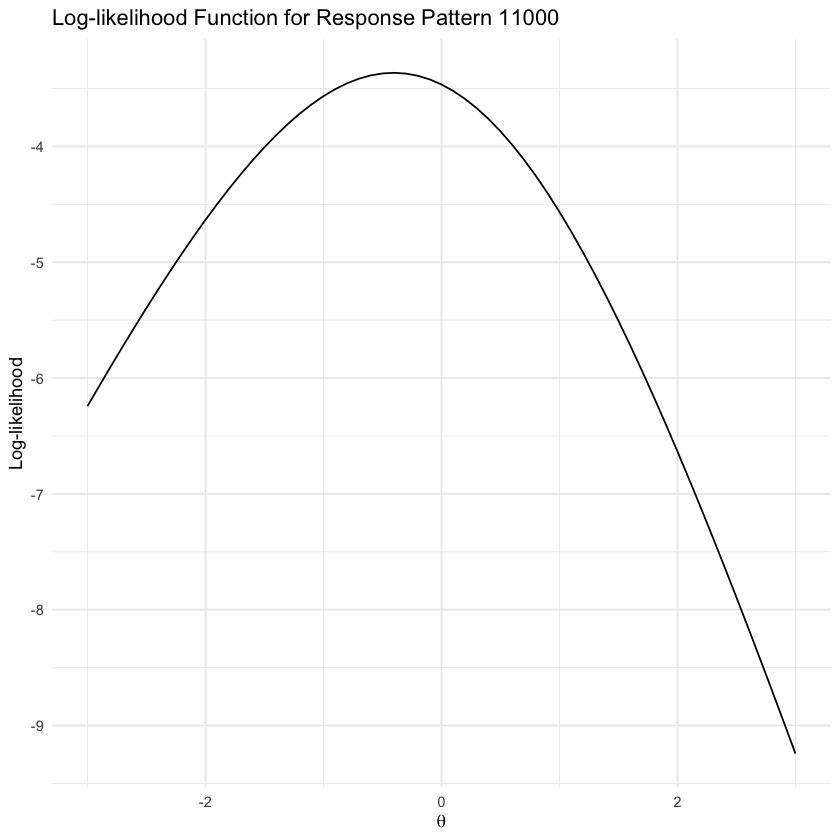

In [10]:
# Definizione del pattern di risposta
response_pattern <- c(1, 1, 0, 0, 0)

# Range di valori di theta da esplorare
theta_values <- seq(-3, 3, by = 0.1)

# Calcolo della log-verosimiglianza per ogni valore di theta
log_likelihoods <- numeric(length(theta_values))
for (i in seq_along(theta_values)) {
    theta <- theta_values[i]
    log_item_probs <- numeric(length(response_pattern))

    # Calcolo delle probabilità logaritmiche individuali per ogni item nel pattern
    for (j in seq_along(response_pattern)) {
        prob_correct <- exp(theta) / (1 + exp(theta))
        prob <- ifelse(response_pattern[j] == 1, prob_correct, 1 - prob_correct)
        log_item_probs[j] <- log(prob)
    }

    # Calcolo della log-verosimiglianza
    log_likelihoods[i] <- sum(log_item_probs)
}

# Creazione di un dataframe per il plotting
plot_data <- data.frame(theta = theta_values, log_likelihood = log_likelihoods)

# Rappresentazione grafica della log-verosimiglianza
ggplot(plot_data, aes(x = theta, y = log_likelihood)) +
    geom_line() +
    labs(
        x = expression(theta), y = "Log-likelihood",
        title = "Log-likelihood Function for Response Pattern 11000"
    ) +
    theme_minimal()


## Errore Standard della Stima e Informazione dell'Item

Nel contesto del modello di Rasch, l'Errore Standard della Stima (EES) è un indice cruciale che misura l'incertezza associata alla stima del livello di abilità di un individuo, $\theta$. L'EES è fondamentale perché offre una misura di quanto fiduciosamente possiamo affermare che la stima di $\theta$ rifletta l'abilità reale del rispondente.

Nel modello di Rasch, l'EES per un dato livello di abilità $\theta$ è calcolato come l'inverso della radice quadrata dell'informazione totale dell'item a quel livello di abilità. Matematicamente, l'EES è espresso come segue:

$$
\begin{equation}
\text{EES}(\theta) = \frac{1}{\sqrt{I(\theta)}},
\end{equation}
$$

dove $I(\theta)$ rappresenta l'informazione totale dell'item a un dato livello di abilità $\theta$. L'informazione dell'item, a sua volta, è una funzione della probabilità di una risposta corretta e della probabilità di una risposta errata per ciascun item, e viene calcolata come:

$$
\begin{equation}
I(\theta) = \sum_{j=1}^{L} p_{ij}(1 - p_{ij}),
\end{equation}
$$

dove $L$ è il numero totale di item, e $p_{ij}$ è la probabilità di una risposta corretta all'item $j$ da parte di una persona con abilità $\theta$.

Questo concetto di informazione dell'item è fondamentale nel modello di Rasch. L'informazione fornita da un item varia in base al livello di abilità del rispondente e raggiunge il suo massimo quando la difficoltà dell'item ($\delta_j$) è uguale al livello di abilità del rispondente ($\theta$). Pertanto, gli item che sono più informativi per un dato livello di abilità contribuiscono maggiormente alla precisione della stima di $\theta$ per quel livello.

Per rappresentare graficamente l'informazione dell'item, possiamo tracciare l'informazione fornita da ciascun item su un grafico in funzione del livello di abilità $\theta$. Questo grafico è noto come "curva di informazione dell'item" e illustra come ogni item contribuisca diversamente all'informazione totale in base al livello di abilità del rispondente.

## Bontà di Adattamento

Similmente a quanto avviene nell'analisi fattoriale, è possibile valutare l'adeguatezza del modello nella Teoria della Risposta all'Item (IRT) confrontando i dati osservati con quelli previsti dal modello. Al posto di affidarci alla tradizionale statistica del chi quadrato ($\chi^2$), impieghiamo un indice specializzato, noto come M2, specificatamente progettato per valutare l'adattamento dei modelli di risposta all'item.

Il calcolo dell'indice M2 implica un'analisi dettagliata delle frequenze delle risposte agli item: si confrontano le frequenze osservate con quelle che il modello prevede, tenendo conto delle varie combinazioni di risposte e dei differenti livelli di abilità dei rispondenti. In termini tecnici, l'indice M2 funziona come un test di bontà di adattamento basato sul test del chi quadrato. Esso misura il grado di discrepanza tra le risposte effettivamente fornite dai partecipanti e quelle che il modello suggerisce dovrebbero verificarsi.

Un aspetto cruciale dell'indice M2 è la sua capacità di considerare non solo le deviazioni nelle risposte individuali agli item, ma anche le possibili correlazioni tra le risposte a item differenti. Questo aspetto lo rende particolarmente adatto per l'analisi dei modelli IRT complessi, in cui esiste una certa interdipendenza tra le risposte agli item, tipica dei modelli a più parametri.

Un valore basso dell'indice M2 indica un buon adattamento del modello ai dati, suggerendo che il modello rappresenta accuratamente il comportamento di risposta degli individui. Al contrario, un valore elevato dell'indice M2 può segnalare un cattivo adattamento, il che potrebbe richiedere un'ulteriore indagine sul modello utilizzato, la revisione delle caratteristiche specifiche degli item, o un esame più approfondito delle proprietà dei rispondenti.

Nella pratica, si determina una soglia critica per il valore del chi quadrato al di sopra della quale l'indice M2 è considerato indicativo di un cattivo adattamento. Se l'indice supera questa soglia, si può concludere che il modello potrebbe non essere il più adatto per descrivere i dati raccolti, portando alla considerazione di alternative o all'analisi più approfondita di elementi specifici del test o dei partecipanti.

In [11]:
M2(fit1PL)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,51.47802,44,0.2043459,0.01845511,0,0.03664579,0.04903324,0.9891628,0.9894036


La statistica M2 è relativamente bassa e non significativa, indicando che non ci sono differenze preoccupanti tra il modello e i dati. Questo è ulteriormente supportato da un RMSEA molto basso e da un CFA e TLI prossimi a 1.

Ricordiamo il significato degli indici RMSEA, CFA e TLI.

**RMSEA (Root Mean Square Error of Approximation)**: 
   - Il RMSEA è una misura di adattamento che valuta quanto bene un modello si adatta ai dati a livello di popolazione. 
   - Un valore basso di RMSEA indica un buon adattamento, suggerendo che il modello approssima bene la realtà.
   - Generalmente, un RMSEA inferiore a 0.05 o 0.06 è considerato indicativo di un ottimo adattamento del modello.

**CFA (Comparative Fit Index)**: 
   - Il CFA è un indice relativo di bontà di adattamento che confronta il modello specificato con un modello nullo o di base. 
   - Valori più vicini a 1 indicano un adattamento migliore. Un CFA superiore a 0.90 o 0.95 è spesso considerato indicativo di un buon adattamento.

**TLI (Tucker-Lewis Index)**: 
   - Simile al CFA, il TLI è un altro indice relativo di adattamento che tiene conto della complessità del modello.
   - Anche per il TLI, valori più vicini a 1 indicano un adattamento migliore. Valori superiori a 0.90 o 0.95 sono generalmente considerati buoni.

### Valutare l'Adattamento degli Item

Tuttavia, nell'IRT, ci interessiamo maggiormente agli indici di adattamento degli item e delle persone. L'IRT ci consente di valutare quanto bene ogni item si adatti al modello e se i pattern di risposta individuali sono allineati con il modello.

Iniziamo con l'addattamento agli item. Sono stati proposti diversi indici per valutare l'adattamento degli item e possiamo utilizzare la funzione `itemfit()` per ottenere una varietà di questi indici. Di default, riceviamo l'S_X2 di Orlando e Thissen (2000) con i corrispondenti gradi di libertà (dfs), RMSEA e valori p. Questo test dovrebbe risultare non significativo per indicare un buon adattamento dell'item. Come vediamo qui sotto, solo l'item V9 mostra un adattamento inferiore. 

In [32]:
itemfit(fit1PL)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,9.963607,7,0.02912803,0.1906452
V2,1.665085,5,0.00000000,0.8932688
V3,7.426816,6,0.02183022,0.2831710
V4,4.040845,6,0.00000000,0.6711489
V5,3.237000,6,0.00000000,0.7785667
V6,3.202982,6,0.00000000,0.7829732
V7,10.638021,6,0.03935867,0.1002291
V8,7.999053,6,0.02583963,0.2381727
V9,12.900604,6,0.04800845,0.0446418


Nel contesto del modello di Rasch, si pone particolare attenzione all'analisi delle statistiche di infit e outfit, che sono indici critici per valutare l'adattamento dei dati al modello.

La statistica di outfit, uno di questi indici, è calcolata come la media dei quadrati dei residui standardizzati. Un residuo è la differenza tra la risposta osservata e quella attesa da un rispondente per un dato item. La risposta attesa è basata sulla probabilità calcolata dal modello di Rasch che il rispondente dia una risposta corretta a quell'item. Per esempio, se il modello prevede una probabilità del 40% che un rispondente risponda correttamente a un item, e il rispondente fornisce effettivamente una risposta corretta, il residuo sarà $1 - 0.40 = 0.60$.

Il residuo standardizzato, $ Z_{si} $, è poi calcolato tramite la formula:

$$
Z_{si} = \frac{X_{si} - E(X_{si})}{\sqrt{Var(X_{si})}},
$$

dove:
- $ Z_{si} $ è lo z-score del residuo per il rispondente $ s $ all'item $ i $.
- $ X_{si} $ rappresenta la risposta osservata del rispondente $ s $ all'item $ i $.
- $ E(X_{si}) $ è la risposta attesa, ovvero la probabilità stimata di una risposta corretta, per il rispondente $ s $ all'item $ i $, come prevista dal modello di Rasch.
- $ Var(X_{si}) $ è la varianza della risposta attesa per il rispondente $ s $ all'item $ i $.

Lo z-score standardizzato aiuta a identificare i casi in cui le risposte dei rispondenti deviano significativamente dalle aspettative del modello. Residui con z-score significativamente alti o bassi possono segnalare problemi di adattamento del modello a quei dati specifici.

L'indice di infit è un altro indice critico nel modello di Rasch. A differenza dell'outfit, che è più influenzato da risposte casuali o outlier, l'infit è più sensibile alle risposte che sono incoerenti con il pattern generale del modello. L'infit è calcolato come una media ponderata dei residui standardizzati, dove i pesi sono inversamente proporzionali alla varianza degli item. Questo rende l'infit particolarmente utile per identificare problemi di adattamento del modello legati alla consistenza interna delle risposte.

Per ottenere le statistiche di infit e outfit, è possibile utilizzare l'argomento `fit_stats = "infit"` nella funzione `itemfit()`. Questo permette di ottenere sia le versioni quadratiche medie sia quelle standardizzate di queste misure. Linacre fornisce linee guida per la loro interpretazione, disponibili all'indirizzo [https://www.rasch.org/rmt/rmt162f.htm](https://www.rasch.org/rmt/rmt162f.htm). Generalmente, i valori non standardizzati dovrebbero situarsi tra 0.5 e 1.5 per essere considerati accettabili.

In [14]:
itemfit(fit1PL, fit_stats = "infit")

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,0.6965602,-3.015776,0.8568138,-2.15528515
V2,0.8290059,-3.074598,0.8671678,-3.56784061
V3,0.8210230,-3.803499,0.8714244,-3.59185038
V4,0.8091443,-3.198260,0.8684851,-3.12504644
V5,0.8005462,-3.813964,0.8609898,-3.61722974
V6,0.8138464,-4.178570,0.8503497,-4.48141825
V7,0.7281043,-1.808226,0.9681214,-0.29523779
V8,0.8753291,-2.808556,0.9126985,-2.55609950
V9,0.6140973,-1.683441,1.0070507,0.09709703


Nel pacchetto `ggmirt`, possiamo anche utilizzare la funzione `itemfitPlot()` per ispezionare visivamente questo aspetto.

`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?


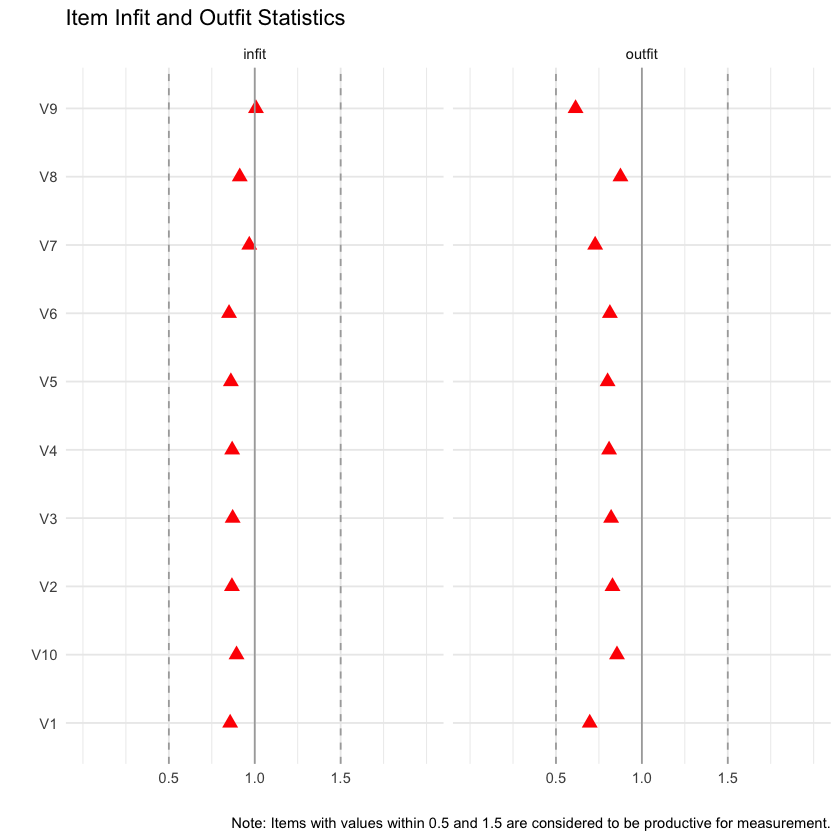

In [15]:
itemfitPlot(fit1PL)

Osserviamo nuovamente che l'item V9 presenta un adattamento inferiore (valore di outfit vicino a 0.5), ma secondo le linee guida di Linacre, ciò non dovrebbe essere motivo di preoccupazione.


## Valutare l'Adattamento delle Persone

Possiamo generare le stesse misure per ogni persona per valutare quanto bene i pattern di risposta di ciascuno si allineano con il modello. Possiamo ragionare in questo modo: se una persona con un alto valore di theta (cioè alta abilità latente) non risponde correttamente a un item facile, questa persona non si adatta bene al modello. Al contrario, se una persona con bassa abilità risponde correttamente a una domanda molto difficile, anche questo non è conforme al modello. Nella pratica, è probabile che ci saranno alcune persone che non si adattano bene al modello. Tuttavia, finché il numero di rispondenti non conformi è basso, la situazione è accettabile. Di solito, ci concentriamo nuovamente sulle statistiche di infit e outfit. Se meno del 5% dei rispondenti presenta valori di infit e outfit superiori o inferiori a 1.96 e -1.96, possiamo considerare il modello adeguato.

In [16]:
head(personfit(fit1PL))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9940921,0.1217803,1.0168433,0.15671292,-0.04009289
2,0.6479582,-0.3695500,0.8143843,-0.63139813,0.66343106
3,0.7056442,-0.4305414,0.8356943,-0.62336826,0.65240983
4,0.7385001,-0.1989923,0.9348439,-0.15118513,0.32452771
5,2.2938763,2.4761297,1.7896444,2.20208688,-2.78187891
6,0.7775077,-0.1298064,0.9870054,0.04396602,0.17801766


In [17]:
personfit(fit1PL) %>%
    summarize(
        infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
        outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))
    ) # lower row = non-fitting people

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
i Please use `reframe()` instead.
i When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."


infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.966,0.98
0.034,0.02


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


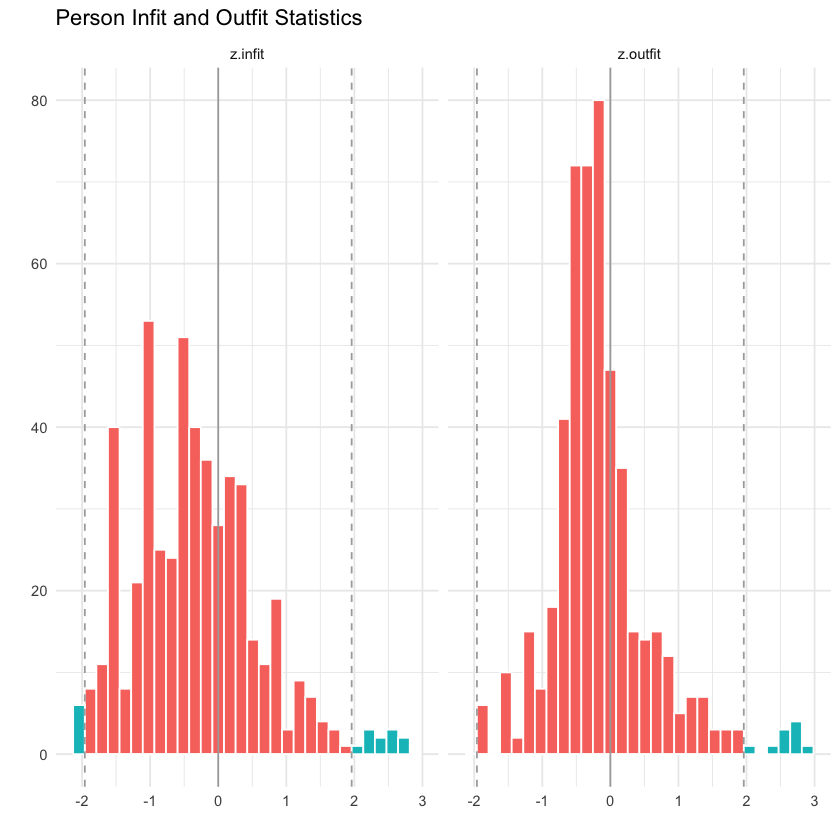

In [18]:
personfitPlot(fit1PL)

In conclusione, nell'analisi corrente, meno del 5% dei rispondenti mostra valori di infit e outfit che eccedono la soglia di 1.96 o che sono inferiori a -1.96. Questo ci permette di affermare con ragionevole certezza che il modello utilizzato è adeguato. Le misure di infit e outfit rimangono entro limiti accettabili per la maggior parte dei partecipanti, indicando una buona aderenza del modello ai dati raccolti.

## Grafici Specifici IRT

Oltre alla valutazione complessiva dell'adattamento del modello, dell'adattamento degli item e delle persone, possiamo esaminare molti altri aspetti. Alcune domande tipiche includono:

- Quanto bene gli item coprono l'intervallo dell'abilità latente?
- C'è ridondanza tra gli item?
- A quali livelli di theta la scala funziona meglio?

A molte di queste domande si può rispondere visualizzando diversi aspetti dei modelli IRT.

**Mappa Item-Persona (Wright Map)**
La prima domanda può essere valutata utilizzando una cosiddetta "Mappa Item-Persona" (noto anche come Wright Map). Questa visualizzazione inizia tracciando la distribuzione dell'abilità latente nel campione studiato. Successivamente, tracciamo anche la difficoltà di ciascun item sulla stessa scala di theta. Allineando entrambi i grafici, possiamo vedere quanto bene gli item coprono l'abilità latente.

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


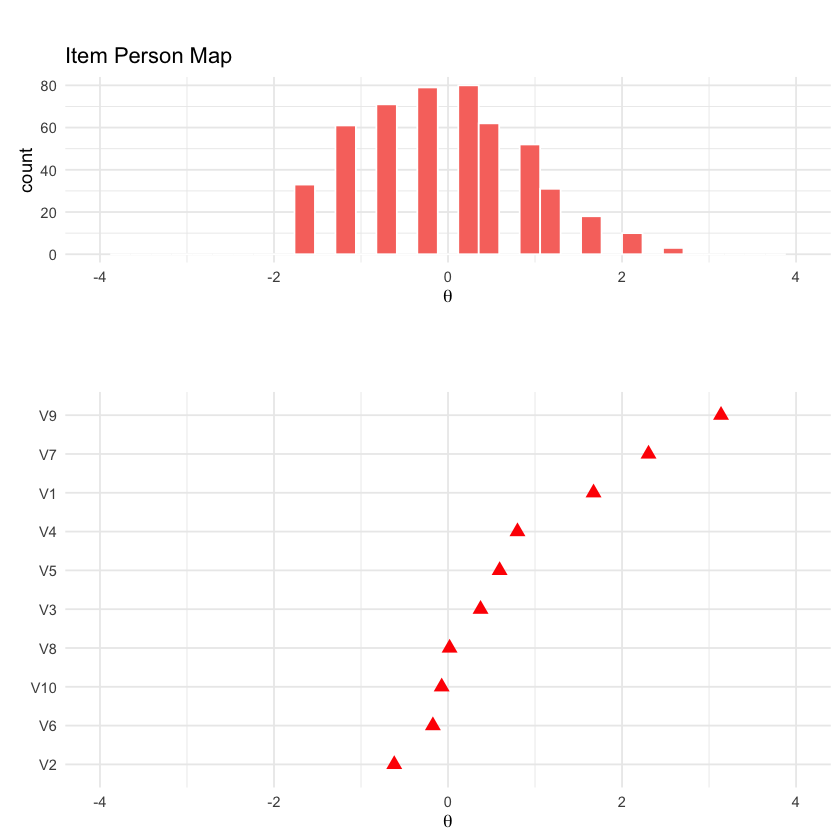

In [19]:
itempersonMap(fit1PL)

**Curve Caratteristiche degli Item**

Le curve caratteristiche degli item offrono un quadro dettagliato e visuale di come ciascun item del test si comporta attraverso diversi livelli dell'abilità latente. Per esempio:

1. **Visualizzazione della Difficoltà e della Discriminazione:**
   - Supponiamo di avere un item che mostra una curva con una ripida salita in un punto specifico della scala di abilità. Questo indica che l'item ha una difficoltà concentrata attorno a quel punto e che discrimina efficacemente tra rispondenti con abilità appena al di sotto e al di sopra di quel livello. 
   - Al contrario, una curva più graduale suggerisce che l'item è meno discriminante, con una variazione più ampia nella probabilità di risposta corretta a seconda del livello di abilità.

2. **Identificazione di Lacune nella Valutazione:**
   - Visualizzando le curve di più item, possiamo identificare se ci sono lacune nella copertura dell'abilità latente. Ad esempio, se tutti gli item hanno curve che si concentrano su livelli di abilità bassi, potrebbe esserci una mancanza di item difficili per misurare l'abilità ad alti livelli.
   - Inoltre, se le curve degli item si sovrappongono eccessivamente, potrebbe indicare ridondanza tra gli item, suggerendo che alcuni di essi non aggiungono informazioni uniche alla valutazione.

3. **Confronto tra Diversi Tipi di Item:**
   - Per esempio, gli item progettati per misurare concetti di base potrebbero avere curve che mostrano alta probabilità di risposta corretta anche a livelli di abilità bassi.
   - Al contrario, item progettati per essere più impegnativi potrebbero mostrare probabilità elevate di risposta corretta solo a livelli di abilità più alti.

Nel caso presente, vediamo che l'item 9 mostra una buona capacità discriminante solo a livelli alti di abilità.

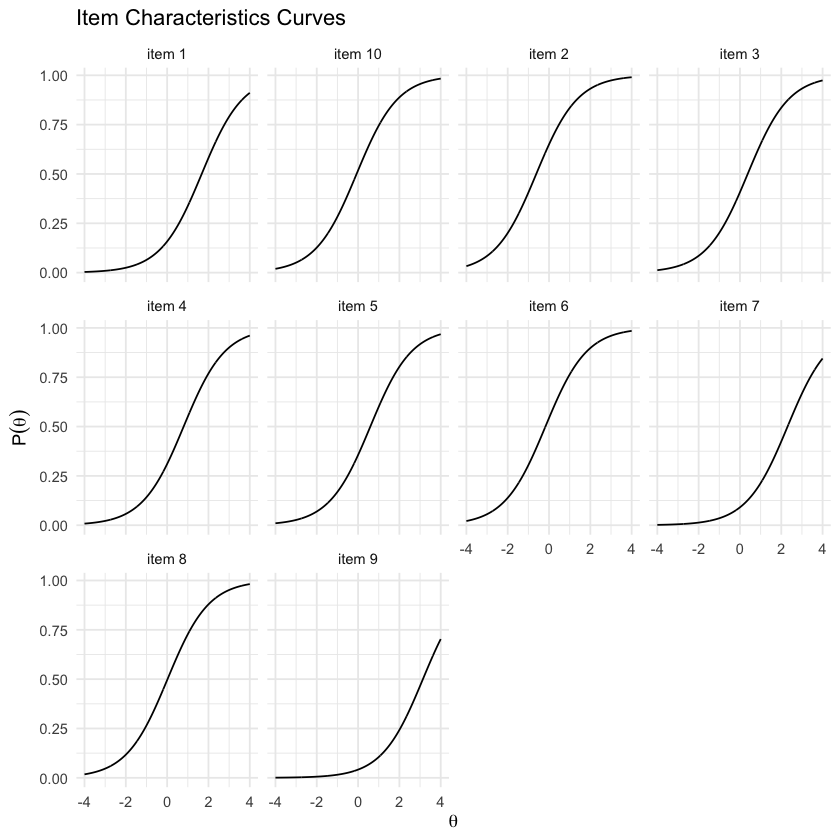

In [20]:
tracePlot(fit1PL)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


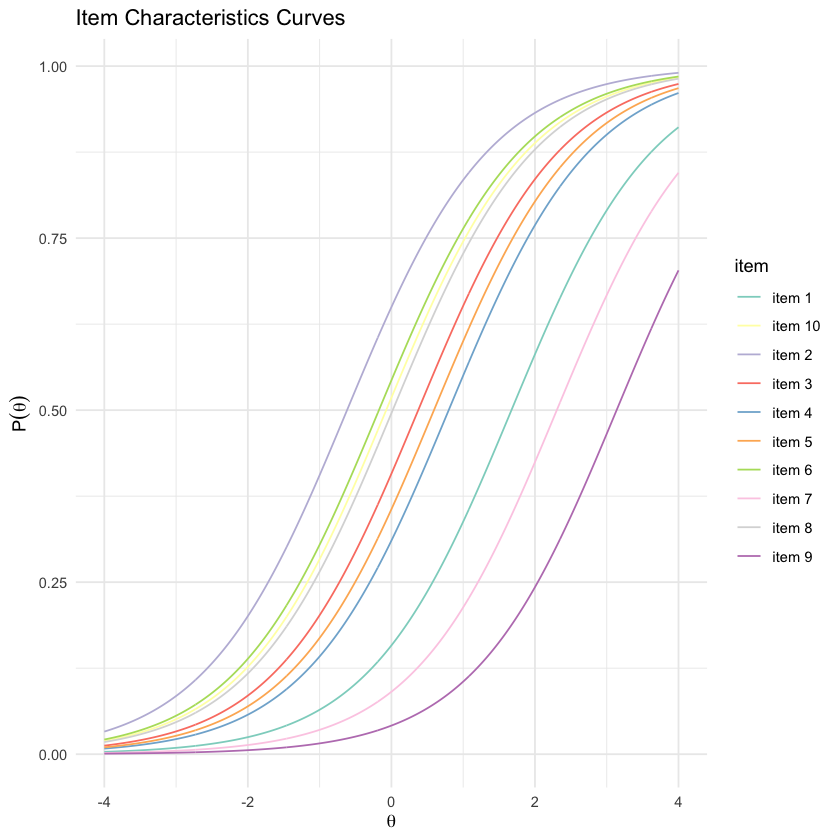

In [21]:
tracePlot(fit1PL, facet = F, legend = T) + scale_color_brewer(palette = "Set3")


**Curve di Informazione degli Item**

Un altro modo per valutare la qualità di ciascun item è tramite la creazione delle cosiddette curve di informazione degli item. L'informazione è un concetto statistico che si riferisce alla capacità di un item di stimare con precisione i punteggi su theta. L'informazione a livello di item chiarisce quanto bene ogni item contribuisca alla precisione nella stima dei punteggi, con livelli più elevati di informazione che portano a stime dei punteggi più accurate.

Per esempio:
- Un item con un'elevata informazione sarà molto utile per discriminare tra rispondenti con diversi livelli di abilità latente attorno a un certo punto della scala di theta. Questo significa che l'item fornisce dati affidabili e significativi sulla capacità o conoscenza che si sta misurando.
- Al contrario, un item con bassa informazione non aggiunge molto alla precisione della stima del punteggio. Questo potrebbe accadere se l'item è troppo facile o troppo difficile per la maggior parte dei rispondenti, o se non è strettamente correlato al tratto latente che si sta cercando di misurare.

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
i The deprecated feature was likely used in the ggmirt package.
  Please report the issue to the authors."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


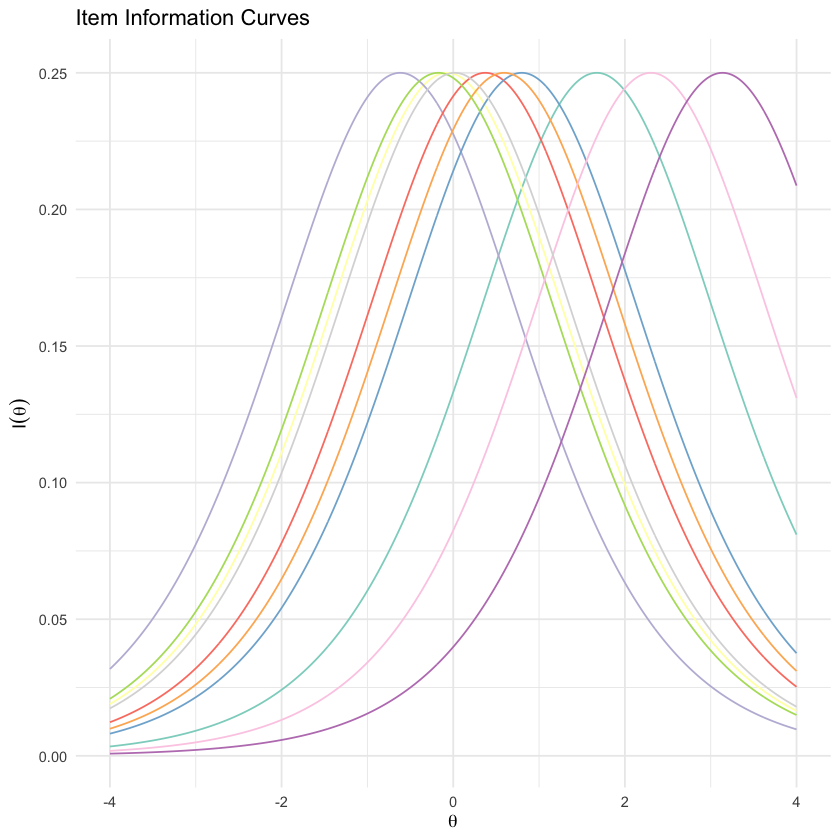

In [22]:
itemInfoPlot(fit1PL) + scale_color_brewer(palette = "Set3")


Qui vediamo chiaramente che alcuni item forniscono maggiori informazioni sui livelli più alti di theta, mentre altri coprono l'intera gamma di theta.

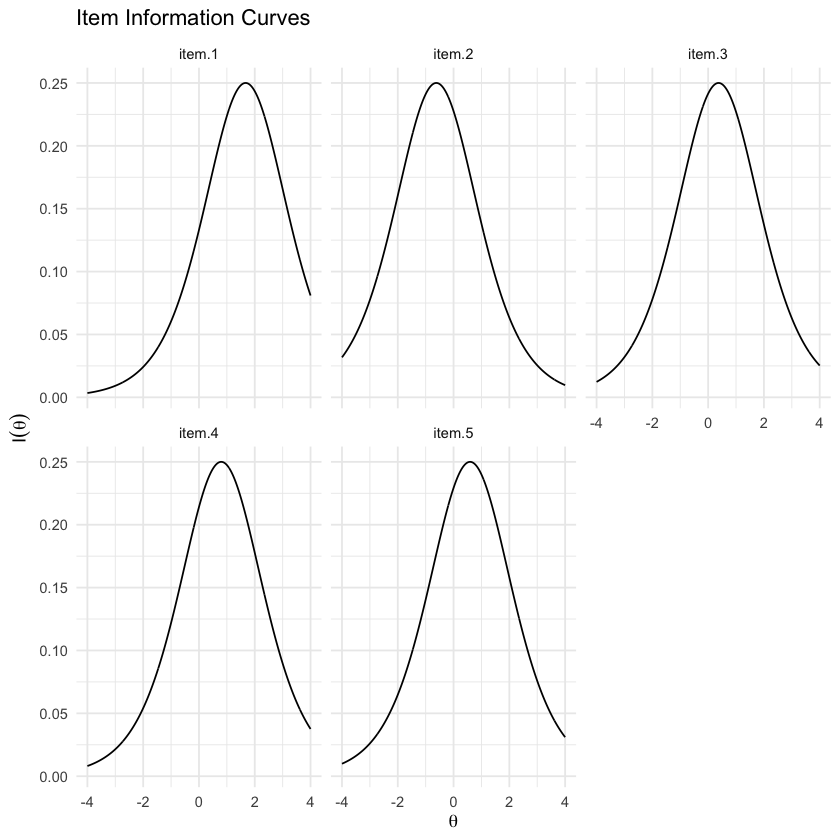

In [24]:
itemInfoPlot(fit1PL, items = c(1:5), facet = TRUE) 


**Curve di Informazione del Test**

Il concetto di "informazione" può essere applicato anche all'intera scala del test. In questo caso, osserviamo che la scala è molto efficace nel stimare i punteggi di theta tra -2 e 3, ma presenta una minore precisione nella stima dei punteggi di theta agli estremi. In altre parole, il test fornisce stime accurate per una vasta gamma di abilità medie e leggermente superiori alla media, ma diventa meno affidabile per valutare abilità molto basse o molto elevate.

Questa osservazione ha importanti implicazioni pratiche:
- **Valutazione Ottimale per la Maggior Parte dei Rispondenti**: La scala è particolarmente adatta per valutare rispondenti il cui livello di abilità si trova all'interno dell'intervallo in cui il test è più informativo (-2 a 4).
- **Limiti nella Valutazione degli Estremi**: Per rispondenti con abilità molto al di sotto di -2 o molto al di sopra di 4, il test potrebbe non fornire stime di abilità così precise. Questo significa che per questi individui, il test potrebbe non essere in grado di discriminare efficacemente tra diversi livelli di abilità.
  
Le curve di informazione del test aiutano a identificare dove il test è più efficace e dove potrebbe aver bisogno di miglioramenti o aggiustamenti, come l'aggiunta di item più difficili o più facili per estendere la sua precisione ai livelli estremi di abilità. Questa analisi consente di ottimizzare il test per una valutazione più accurata su tutta la gamma di abilità latente che si intende misurare.

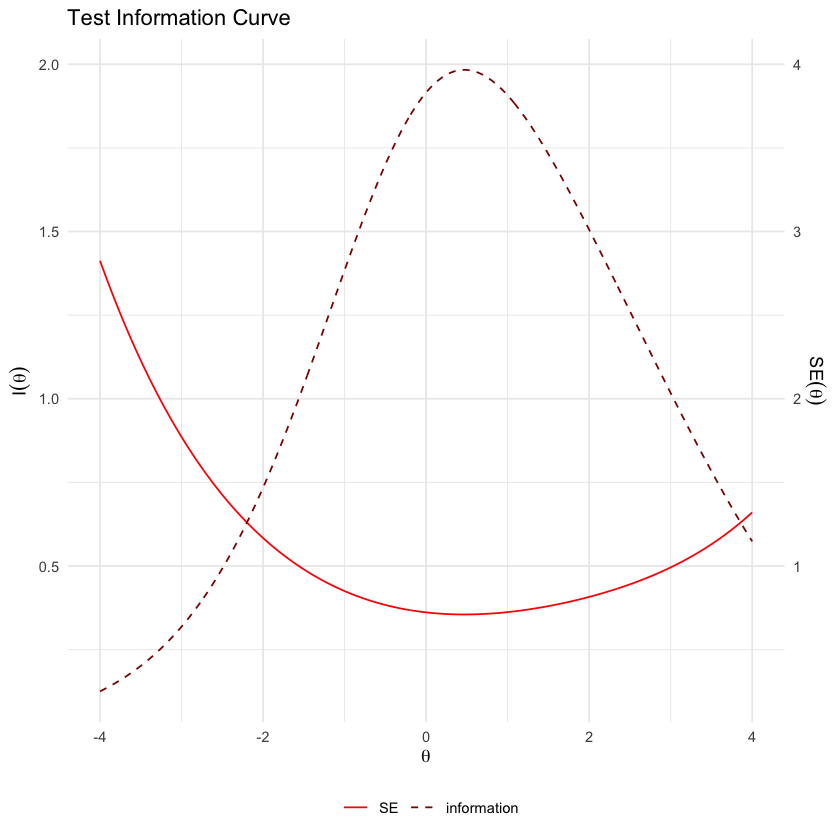

In [25]:
testInfoPlot(fit1PL, adj_factor = 2)

**Affidabilità Condizionale**

Il concetto di affidabilità varia tra la Teoria Classica dei Test (CTT) e la Teoria della Risposta all'Item (IRT). Nell'IRT, possiamo calcolare l'affidabilità condizionale, ossia l'affidabilità della scala a diversi livelli di theta. 

- Nella **CTT**, l'affidabilità è solitamente considerata come una proprietà fissa del test, indipendentemente dal livello di abilità dei rispondenti. Si misura spesso attraverso il coefficiente alfa di Cronbach o metodi simili.
- Nell'**IRT**, invece, l'affidabilità è vista come una proprietà variabile che dipende dal livello di theta del rispondente. A diversi livelli di theta, la precisione con cui il test misura l'abilità può variare significativamente.
  
L'affidabilità condizionale fornisce una misura più specifica e dettagliata di quanto affidabilmente un test misura l'abilità a diversi livelli di theta. Nel caso presente, 
- **A Livelli Medi di Theta**: Il test mostra una buona affidabilità, indicando che è in grado di distinguere con precisione tra rispondenti con abilità medie.
- **Agli Estremi di Theta**: Il test mostra un'affidabilità più bassa, suggerendo che non è altrettanto efficace nel distinguere tra livelli di abilità molto alti o molto bassi.

In sostanza, l'affidabilità condizionale nell'IRT ci fornisce una comprensione più dettagliata di dove il test funziona bene e dove potrebbe richiedere miglioramenti per valutare con precisione l'abilità su tutta la gamma di theta.

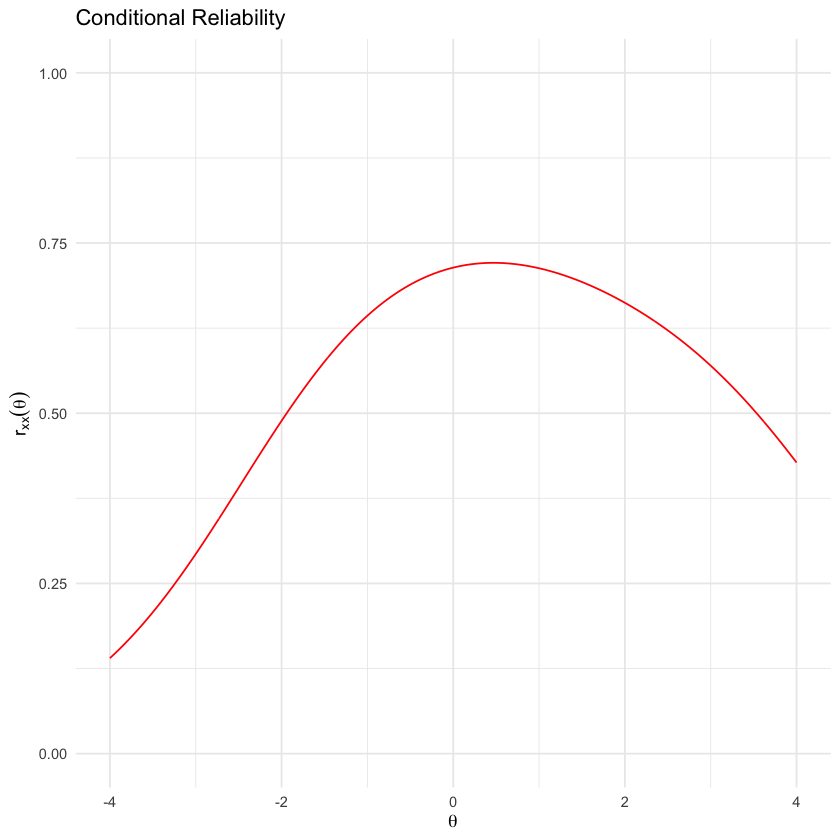

In [26]:
conRelPlot(fit1PL)


È comunque possibile calcolare un singolo valore di attendibilità:

In [27]:
marginal_rxx(fit1PL)


[1] 0.6200104

**Curve Caratteristiche della Scala**

Una proprietà aggiuntiva di un modello IRT è che il punteggio complessivo delle risposte corrette (la somma dei punteggi per le risposte corrette) risulta essere una stima efficace del tratto latente sottostante. Un grafico delle cosiddette curve caratteristiche della scala permette di valutare visivamente questo aspetto tracciando la relazione tra theta e il punteggio di risposte corrette.

- Questo tipo di grafico mostra come il punteggio totale delle risposte corrette si correla con il livello di abilità latente (theta) stimato dal modello IRT.
- Ad esempio, se la curva mostra che punteggi più alti di risposte corrette corrispondono sistematicamente a livelli più alti di theta e viceversa, ciò indica che il punteggio totale è un buon indicatore del tratto latente.
- Al contrario, se la curva non mostra una relazione chiara o lineare tra punteggio totale e theta, ciò potrebbe suggerire che il punteggio totale non cattura completamente la complessità o le sfumature del tratto latente.

In sintesi, le curve caratteristiche della scala forniscono una rappresentazione visiva di come il punteggio totale di risposte corrette rifletta l'abilità latente misurata dal test, offrendo una visione utile per valutare l'efficacia del punteggio totale come indicatore del tratto latente in questione.

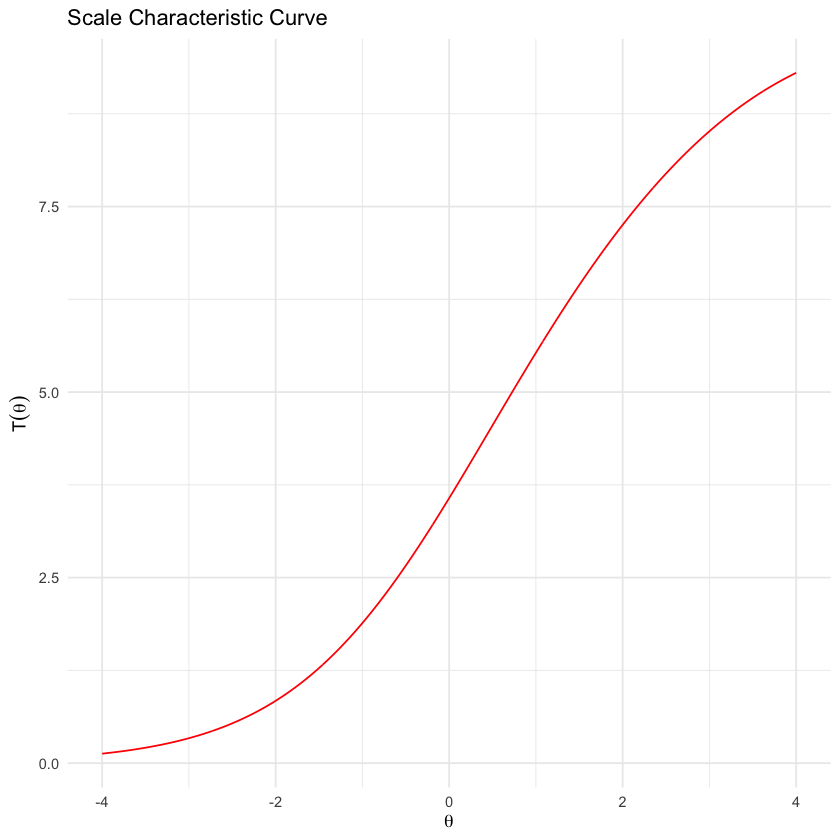

In [28]:
scaleCharPlot(fit1PL)


ChatGPT
Questa curva di solito assume la forma di una S, poiché la relazione è più forte nel range medio di theta e meno precisa agli estremi (come già visto nella curva di informazione del test). Possiamo ovviamente testare anche questo con una semplice correlazione. Per prima cosa, estraiamo il punteggio latente IRT utilizzando la funzione `fscores()`. Quindi lo correlazioniamo con il semplice punteggio di risposte corrette.

In [29]:
score <- fscores(fit1PL)
sumscore <- rowSums(d)
cor.test(score, sumscore)


	Pearson's product-moment correlation

data:  score and sumscore
t = 409.53, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9982341 0.9987574
sample estimates:
      cor 
0.9985187 


Nel caso presente, la correlazione è quasi perfetta.

In conclusione, non ci sono evidenze di violazione delle assunzioni, per cui dobbiamo concludere che il modello di Rash è adeguato per i presenti dati.

## Modello IRT a due parametri

Il modello 2PL, noto come "Modello IRT a due parametri", prevede che le curve caratteristiche degli item non siano tra loro parallele. Questo modello utilizza due parametri per descrivere le curve caratteristiche di ciascun item: il parametro di difficoltà $\delta_i$ e il parametro di discriminazione $\alpha_i$. Il parametro $\alpha_i$ consente alle curve caratteristiche di avere pendenze diverse e riflette la capacità discriminante dell'item rispetto alla variabile latente. Le curve caratteristiche nel modello 2PL hanno la seguente forma:

$$
\begin{equation} 
  Pr(X_{vi} = 1 \mid \theta_v, \delta_i, \alpha_i) = \frac{\exp(\alpha_i(\theta_v-\delta_i))}{1+ \exp(\alpha_i(\theta_v-\delta_i))}.
\end{equation}
$$ (eq-2pl)

Adattiamo il modello 2PL ai dati.

In [5]:
fit2PL <- mirt(d, model = 1, itemtype = "2PL", verbose = FALSE)

Esaminiamo i coefficienti.

In [6]:
coef(fit2PL, IRTpars = TRUE)

,a,b,g,u
par,1.69869,1.168329,0,1
,a,b,g,u
par,1.018359,-0.5818296,0,1
,a,b,g,u
par,1.083872,0.3432059,0,1
,a,b,g,u
par,1.275067,0.6568518,0,1
,a,b,g,u
par,1.17717,0.5137876,0,1
,a,b,g,u


Esaminiamo le curve caratteristiche degli item.

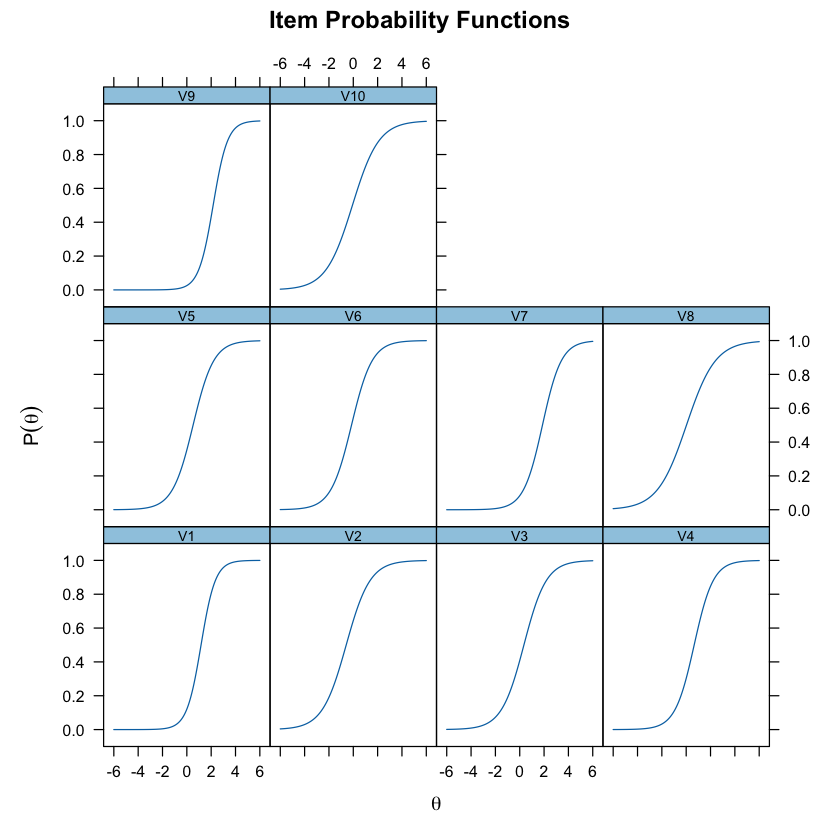

In [7]:
plot(fit2PL, type = "trace")

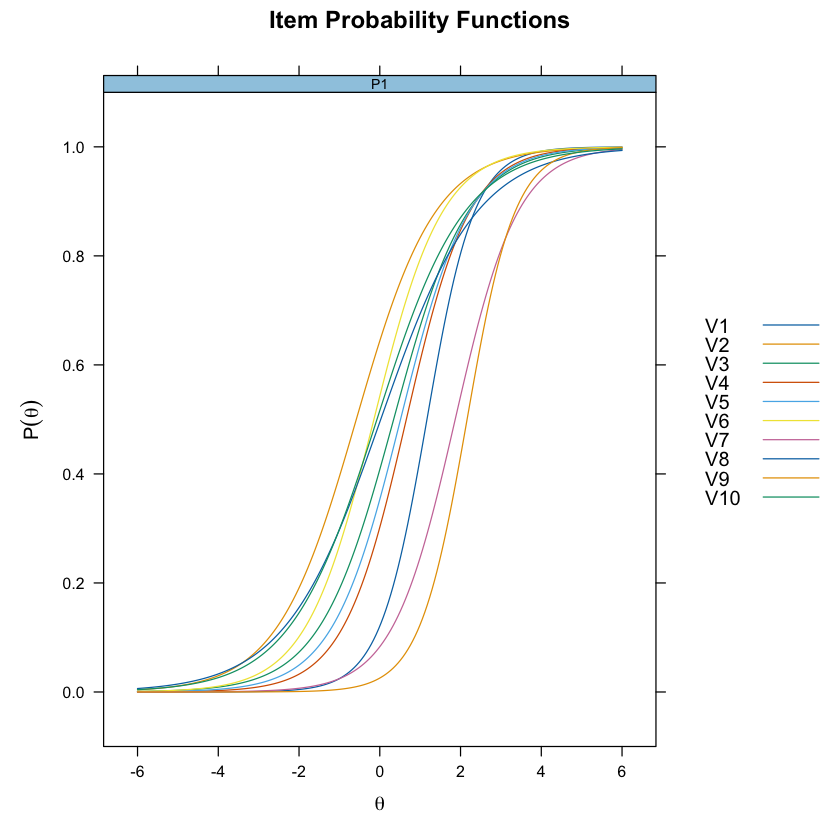

In [8]:
plot(fit2PL, type = "trace", facet_items = FALSE)

Effettuiamo un confronto tra il modello di Rash e il modello 2PL.

In [38]:
anova(fit1PL, fit2PL)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit1PL,5515.786,5527.232,5533.978,5562.147,-2746.893,NA,NA,NA
fit2PL,5518.465,5539.276,5551.541,5602.757,-2739.232,15.32166,9,0.08247097


Il test del rapporto di verosimiglianze indica che il modello 2PL non fornisce un adattamento migliore ai dati del modello di Rash.

## Modello IRT a tre parametri

Per considerare l'eventuale tendenza dei rispondenti a indovinare, i modelli IRT introducono un ulteriore parametro, denotato con $\gamma_i$. Il modello a tre parametri (3PL) assume la seguente forma:

$$
\begin{equation} 
Pr(X_{vi} = 1 \mid \theta_v, \delta_i, \alpha_i, \gamma_i) = \gamma_i + (1-\gamma_i) \frac{\exp(\alpha_i(\theta_v-\delta_i))}{1 + \exp(\alpha_i(\theta_v-\delta_i))}.
\end{equation}
$$ (eq-3pl)

Il parametro $\gamma_i$ ha l'effetto di introdurre un asintoto orizzontale maggiore di zero per valori di $\theta_v$ tendenti a $-\infty$. In altre parole, per item con $\gamma_i = 0.25$, la probabilità di risposta corretta dovuta al caso è almeno pari a 0.25, anche per i livelli di abilità latente più bassi.

In [9]:
fit3PL <- mirt(d, model = 1, itemtype = "3PL", verbose = FALSE)

Esaminiamo i parametri

In [10]:
coef(fit3PL, IRTpars = TRUE)

,a,b,g,u
par,1.702576,1.168331,0.0001847327,1
,a,b,g,u
par,1.018063,-0.5794042,0.00101664,1
,a,b,g,u
par,1.078414,0.3492798,0.001445519,1
,a,b,g,u
par,1.803036,0.8097484,0.09218104,1
,a,b,g,u
par,1.191779,0.5248071,0.004935434,1
,a,b,g,u


Esaminiamo le curve caratteristiche degli item.

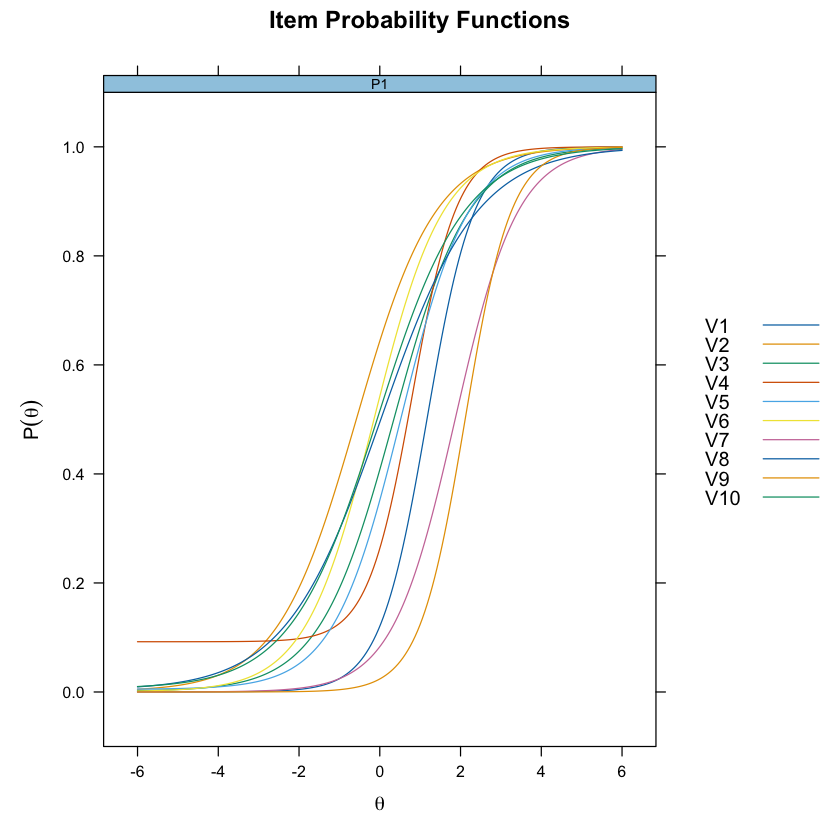

In [11]:
plot(fit3PL, type = "trace", facet_items = FALSE)

Un elemento chiave del modello 3PL è che l'asintoto inferiore, rappresentato dal parametro $\gamma_i$, assume un valore maggiore di zero. Questo implica che la probabilità di una risposta corretta, rappresentata da $\gamma_i$, risulta essere superiore a 0.5 per valori relativamente bassi di abilità latente. In altre parole, gli item con $\gamma_i > 0$ forniscono una probabilità di risposta corretta più alta anche per rispondenti con livelli di abilità latente relativamente bassi.

Ciò comporta che tali item risultano essere più facili per i rispondenti con abilità latente inferiore, in confronto agli item con $\gamma_i = 0$. Questa caratteristica dei modelli 3PL permette di includere il tasso di guessing nella probabilità di risposta corretta e offre una maggiore flessibilità nella modellazione del comportamento degli item rispetto al modello a due parametri (2PL), nel quale l'asintoto inferiore è pari a zero.

Effettuiamo il confronto tra i modelli 2PL e 3PL.

In [42]:
anova(fit2PL, fit3PL)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit2PL,5518.465,5539.276,5551.541,5602.757,-2739.232,NA,NA,NA
fit3PL,5537.377,5568.594,5586.991,5663.816,-2738.689,1.087351,10,0.9997476


Il test del rapporto di verosimiglianze non fornisce evidenze che l'aggiunta di un ulteriore parametro migliori l'adattamento del modello. Concludiamo dunque accettando il modello di Rash.

## Vantaggi della Teoria della Risposta all'Item 

La IRT presenta diversi vantaggi rispetto alla Teoria Classica dei Test:

**Precisione e Dettaglio**: L'IRT analizza le risposte a livello di singolo item attraverso varie funzioni di risposta, offrendo una comprensione dettagliata della performance di ogni domanda. Questa precisione consente di identificare specifiche aree di forza e debolezza all'interno di un test, fornendo intuizioni preziose sui singoli rispondenti e sugli item, e riducendo gli errori di misurazione.

**Separazione tra Attributo della Persona e Caratteristiche dell'Item**: Un vantaggio fondamentale della IRT è la chiara distinzione tra l'abilità della persona ($\theta_p$) e la difficoltà dell'item ($b_i$). A differenza della Teoria Classica dei Test (CTT), dove la difficoltà degli item può variare in base al gruppo di rispondenti, nella IRT queste difficoltà sono considerate proprietà fisse degli item stessi, rimanendo costanti per tutti i rispondenti. Questa specifica separazione accresce notevolmente la precisione e la flessibilità nel processo di misurazione. Nella IRT, la relazione $\theta_p - b_i$ implica che sia l'abilità della persona che la difficoltà dell'item vengono misurate utilizzando la stessa scala. Questo aspetto permette un confronto diretto e quantitativo tra abilità e difficoltà, facilitando l'analisi e l'interpretazione dei risultati.

**Adattabilità a Diversi Modelli di Risposta**: La flessibilità dell'IRT consente l'analisi di diversi modelli di risposta, adattandosi a vari formati di domanda come domande a scelta multipla, scale Likert e domande aperte. Questa adattabilità garantisce una valutazione completa, catturando le sfumature della cognizione e del comportamento umano.

**Valutazione Individualizzata/Adattiva**: A differenza dei metodi tradizionali, gli errori di misurazione nell'IRT sono una funzione sia del livello dell'attributo della persona sia dei parametri dell'item. Ad esempio, nell'IRT, gli item con difficoltà più vicine al livello dell'attributo della persona forniscono più informazioni sull'attributo rispetto ad altri item. Pertanto, le valutazioni possono essere personalizzate sul livello dell'attributo dei rispondenti per ridurre gli errori di misurazione.

**Analisi Completa degli Item**: L'IRT può essere utilizzata per condurre un'analisi approfondita degli item, valutando parametri come discriminazione dell'item, difficoltà e parametri di indovinamento. Questa analisi dettagliata fornisce informazioni importanti per l'utilizzo e il miglioramento degli item.

## Conclusione

Tradizionalmente, il punteggio totale ottenuto in un test psicologico è stato considerato come la misura più efficace dell'abilità o della predisposizione di una persona rispetto a un certo tratto di personalità. Tuttavia, la dipendenza del punteggio totale dalla difficoltà degli item presenta limitazioni significative. Ad esempio, due persone possono ottenere lo stesso punteggio totale rispondendo in modo diverso a item di varia difficoltà, il che non riflette accuratamente le loro abilità reali.

Nella Teoria Classica dei Test (CTT), l'enfasi è posta sul punteggio totale, ma questa prospettiva ignora le variazioni nella difficoltà degli item e assume che gli errori di misurazione si annullino reciprocamente attraverso la procedura di sommazione. Tuttavia, la CTT è limitata dalla sua assunzione di varianze di errore uniformi per tutti i rispondenti, dall'aspettativa di errori di misurazione nulli e dalla focalizzazione esclusiva sui punteggi totali, senza considerare l'adattamento di item e persone.

Al contrario, la Teoria della Risposta all'Item (IRT) cambia il focus dai punteggi totali alle risposte a ciascun item, sfruttando le caratteristiche degli item. L'IRT descrive come attributi come abilità, atteggiamento o personalità, insieme alle caratteristiche degli item, influenzino la probabilità di fornire una risposta. Il Modello di Rasch, una forma semplice di IRT per risposte binarie, stabilisce una relazione diretta tra la probabilità di una risposta corretta e il livello di abilità del rispondente.

La stima dell'abilità in IRT non dipende dagli specifici item somministrati, permettendo di confrontare i risultati tra gruppi diversi con lo stesso set di item. Inoltre, la qualità degli item è valutata indipendentemente dal campione di rispondenti, rendendo le proprietà degli item costanti tra diversi gruppi con varie abilità.

L'IRT supera i limiti della CTT stimando congiuntamente le proprietà degli item e il livello di abilità dei rispondenti. Le caratteristiche degli item diventano indipendenti dal campione di individui utilizzato per costruire il test, permettendo la creazione di insiemi di item equivalenti per misurare abilità latenti. Questo approccio offre maggiore precisione e affidabilità nelle misurazioni, assicurando la comparabilità tra diversi gruppi di individui. In conclusione, l'IRT rappresenta un metodo statistico avanzato e versatile per una valutazione più accurata e affidabile di tratti e abilità in contesti psicometrici.